In [98]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import math
import statistics
from statistics import mean
import matplotlib.ticker as mtick
from sklearn.model_selection import KFold
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

# Définition des fonctions nécessaires

In [99]:
#Calcul de la distance euclidienne
def distance_euclidienne(X, mean):
    return ((X-mean).T)@(X-mean)

In [100]:
#Calcul de la distance de mahalanobis
def distance_Mahalanobis(X, mean,cov,p):
    return (((X-mean).T)@np.linalg.inv(cov)@(X-mean))+(np.linalg.det(cov)-2*p)

In [101]:
#Calcul de la distance manhattan
def distance_manhattan(X,Y):
    Z=X-Y        
    return sum(abs(Z[i,0]) for i in range(len(X)))

In [102]:
#Calcul des moyennes des différentes classes
def moyenne(df):
    moyenne=np.zeros((5,2))
    for i in range(5):
        moyenne[i,0] = df[df.Classe==i+1]['x'].mean()
        moyenne[i,1] = df[df.Classe==i+1]['y'].mean()
    return moyenne

In [103]:
#Calcul de la matrice de covariance de deux variables X et Y
def Calcul_covariance(X,Y):
    mx=X.mean()
    my=Y.mean()
    s=X.shape[0]
    Xc=np.zeros((s,2))
    Xc[:,0]=X-mx
    Xc[:,1]=Y-my
    cov=(1/(s-1))*(Xc.T@Xc)
    return cov

In [104]:
#Calcul de La matrice de covariance des différentes classes
def covs(df):
    covs=[]
    for i in range(5):
        covs.append(Calcul_covariance(df[df.Classe==i+1]['x'], df[df.Classe==i+1]['y']))
    return covs

In [105]:
#Classification selon la distance euclidienne en TOP2 et en TOP1
def ClassificationTOP2DE(pointX,df):
    means=moyenne(df)
    mean1=means[0:1,:].T
    mean2=means[1:2,:].T
    mean3=means[2:3,:].T
    mean4=means[3:4,:].T
    mean5=means[4:5,:].T
    values= []
    Classe= []
    values.append(abs(distance_euclidienne(pointX, mean1)))
    values.append(abs(distance_euclidienne(pointX, mean2)))
    values.append(abs(distance_euclidienne(pointX, mean3)))
    values.append(abs(distance_euclidienne(pointX, mean4)))
    values.append(abs(distance_euclidienne(pointX, mean5)))
    indexTop1=values.index(min(values))
           
    Classe.append(indexTop1+1)
    Classe.append(values.index(min(v for v in values if values.index(v) != indexTop1))+1)
    
    return Classe

In [106]:
#Classification selon la distance malhanobis en TOP2 et en TOP1
def ClassificationTOP2Malh(pointX,df):
    cov=covs(df)
    cov1=cov[0]
    cov2=cov[1]
    cov3=cov[2]
    cov4=cov[3]
    cov5=cov[4]
    means=moyenne(df)
    mean1=means[0:1,:].T
    mean2=means[1:2,:].T
    mean3=means[2:3,:].T
    mean4=means[3:4,:].T
    mean5=means[4:5,:].T
    values= []
    Classe= []
    values.append(abs(distance_Mahalanobis(pointX, mean1,cov1,1/5)))
    values.append(abs(distance_Mahalanobis(pointX, mean2,cov2,1/5)))
    values.append(abs(distance_Mahalanobis(pointX, mean3,cov3,1/5)))
    values.append(abs(distance_Mahalanobis(pointX, mean4,cov4,1/5)))
    values.append(abs(distance_Mahalanobis(pointX, mean5,cov5,1/5)))
    #print(values)
    indexTop1=values.index(min(values))
           
    Classe.append(indexTop1+1)
    Classe.append(values.index(min(v for v in values if values.index(v) != indexTop1))+1)
    
    return Classe

In [107]:
#Classification avec les fenetres de Parzen selon le noyau uniforme en TOP2 et en TOP1
def ClassificationNUniforme(pointX,df,h):
    values= []
    Classe= []
    CTop2 = {1 : 0, 2 : 0, 3 : 0, 4 : 0, 5 : 0 }
    values.append(fn_Uniforme(pointX,df[df.Classe==1],h))
    values.append(fn_Uniforme(pointX,df[df.Classe==2],h))
    values.append(fn_Uniforme(pointX,df[df.Classe==3],h))
    values.append(fn_Uniforme(pointX,df[df.Classe==4],h))
    values.append(fn_Uniforme(pointX,df[df.Classe==5],h))
    indexTop1=values.index(max(values))
    #print("l",len(values))
    #print("values")
    #for v in values:
        #print(v)
    
    for i in range(len(values)):
        
        if i != indexTop1:
            CTop2[i+1]=values[i]
    #print("CTop2")
    #for c in CTop2:
        #print(CTop2.get(c))
    
    #print("itop1",indexTop1+1)
    #print("minTop2",max(CTop2, key=lambda k: CTop2[k]) )
    Classe.append(indexTop1+1)
    Classe.append(max(CTop2, key=lambda k: CTop2[k]))
    return Classe

In [108]:
#Classification avec les fenetres de Parzen selon le noyau gaussien en TOP2 et en TOP1
def ClassificationNGaussienne(pointX,df,h):
    values= []
    Classe= []
    CTop2 = {1 : 0, 2 : 0, 3 : 0, 4 : 0, 5 : 0 }
    values.append(fn_Gaussienne(pointX,df[df.Classe==1],h))
    values.append(fn_Gaussienne(pointX,df[df.Classe==2],h))
    values.append(fn_Gaussienne(pointX,df[df.Classe==3],h))
    values.append(fn_Gaussienne(pointX,df[df.Classe==4],h))
    values.append(fn_Gaussienne(pointX,df[df.Classe==5],h))
    indexTop1=values.index(max(values))
    #print("l",len(values))
    #print("values")
    #for v in values:
        #print(v)
    
    for i in range(len(values)):
        
        if i != indexTop1:
            CTop2[i+1]=values[i]
    #print("CTop2")
    #for c in CTop2:
        #print(CTop2.get(c))
    
    #print("itop1",indexTop1+1)
    #print("minTop2",max(CTop2, key=lambda k: CTop2[k]) )
    Classe.append(indexTop1+1)
    Classe.append(max(CTop2, key=lambda k: CTop2[k]))
    return Classe

In [109]:
#Calcul de la vraisemblance selon le noyau uniforme
def fn_Uniforme(X,df,h):
    n=df.shape[0]
    U= []
    Xi=np.zeros((2,1))
    for i in df.index:
        Xi[0,0]=df["x"][i]
        Xi[1,0]=df["y"][i]
        dist=distance_manhattan(X,Xi)
        U.append(dist/h)    
        #print(dist)
            
    return (1/(float(n)*float(h)))*sum(phiU(u) for u in U)

In [110]:
#Calcul de vraisemblance selon le noyau gaussien
def fn_Gaussienne(X,df,h):
    n=df.shape[0]
    U= []
    Xi=np.zeros((2,1))
    for i in df.index:
        Xi[0,0]=df["x"][i]
        Xi[1,0]=df["y"][i]
        dist=distance_manhattan(X,Xi)
        U.append(dist/h)    
        #print(dist) 
    return (1/(float(n)*float(h)))*sum(phiG(u) for u in U)

In [345]:
#Définition de phi(x) selon le noyau uniforme
def phiU(u):
    if (abs(u)<=1): value =1/2
    else : value=0
    return value

In [112]:
#Définition de phi(x) selon le noyau gaussien
def phiG(u):
    return (1/(2*math.pi))*math.exp(-(u**2)/2)

In [113]:
#Fonction Classification kppv
def Classification_kppv(X,df,k):
    CountKValues={1 : 0, 2 : 0, 3 : 0, 4 : 0, 5 : 0 }
    CTop2 = {1 : 0, 2 : 0, 3 : 0, 4 : 0, 5 : 0 }
    Distances= []
    Classe= []
    JA = pd.DataFrame(columns=['Classe', 'x', 'y','distance'])
    
               
    for j in df.index:
            pointX=np.zeros((2,1))
            pointX[0,0]=df['x'][j]
            pointX[1,0]=df['y'][j]
            #eulidienne [0][0]
            JA = JA.append({'Classe': df['Classe'][j], 'x': df['x'][j], 'y': df['y'][j], 'distance': distance_manhattan(pointX,X)}, ignore_index=True)
    #print(JA)
    if k==1 :
        idmin=JA['distance'].idxmin()
        #print(idmin)
        indexTop1=JA.iloc[idmin].Classe
        #print(indexTop1)
    else:
        DfMin=JA.sort_values(by=['distance']).head(k)
        DfMin = DfMin.reset_index()
        del DfMin['index']
        #print(DfMin)
        for i in DfMin.index:

            ClasseMin=DfMin['Classe'][i]
            #print(ClasseMin," ",i)
            for l in range (1,len(CountKValues)+1):

                if (ClasseMin==l):
                    CountKValues[l]=CountKValues[l]+1  
        #JA=JA[JA['distance']!=min]
        
    
        indexTop1=max(CountKValues, key=lambda k: CountKValues[k])   
    for m in range (1,len(CountKValues)+1):
        
        if m != indexTop1:
            CTop2[m]=CountKValues[m]
        
    Classe.append(indexTop1)
    if k!=1 :
        Classe.append(max(CTop2, key=lambda k: CTop2[k]))
    else :
        Classe.append(indexTop1)
        #print(Classe)
    return Classe

In [114]:
#Faire la classification selon 5CV pour les fenetres de Parzen selon le noyau gaussien et uniforme
def scenarios(df,h):
    k=20
    T=[]
    for i in range(5):
        dfscA = pd.DataFrame(columns=['Classe', 'x', 'y'])
        dfscA=pd.concat([df[df.Classe==1].iloc[0:20*i],df[df.Classe==1].iloc[20*i+20:500],df[df.Classe==2].iloc[20*i+20:500],df[df.Classe==2].iloc[0:20*i],df[df.Classe==3].iloc[20*i+20:500],df[df.Classe==3].iloc[0:20*i]])
        dfscA=pd.concat([dfscA,df[df.Classe==4].iloc[20*i+20:500],df[df.Classe==4].iloc[0:20*i],df[df.Classe==5].iloc[20*i+20:500],df[df.Classe==5].iloc[0:20*i]])

        dfscT = pd.DataFrame(columns=['Classe', 'x', 'y','ClassifTop1FPU','ClassifTop2FPU','ClassifTop1FPG','ClassifTop2FPG'])
        JA = pd.DataFrame(columns=['Classe', 'x', 'y'])
        JA=pd.concat([df[df.Classe==1].iloc[20*i:20*i+20],df[df.Classe==2].iloc[20*i:20*i+20],df[df.Classe==3].iloc[20*i:20*i+20]])
        JA=pd.concat([JA,df[df.Classe==4].iloc[20*i:20*i+20],df[df.Classe==5].iloc[20*i:20*i+20]])
        for j in JA.index:
            pointX=np.zeros((2,1))
            pointX[0,0]=JA['x'][j]
            pointX[1,0]=JA['y'][j]
            dfscT = dfscT.append({'Classe': JA['Classe'][j], 'x': JA['x'][j], 'y': JA['y'][j], 'ClassifTop1FPU': ClassificationNUniforme(pointX,dfscA,h)[0], 'ClassifTop2FPU': ClassificationNUniforme(pointX,dfscA,h)[1], 'ClassifTop1FPG': ClassificationNGaussienne(pointX,dfscA,h)[0], 'ClassifTop2FPG': ClassificationNGaussienne(pointX,dfscA,h)[1]}, ignore_index=True)
        T.append(((dfscT.loc[dfscT.ClassifTop1FPU == dfscT.Classe]).shape[0]/dfscT.shape[0],(dfscT.loc[dfscT.ClassifTop1FPG == dfscT.Classe]).shape[0]/dfscT.shape[0]))
    return T


In [341]:
#Faire la classification selon 5CV pour KPPV
def scenarios_kppv(df,k):
    T=[]
    for i in range(5):
        dfscA = pd.DataFrame(columns=['Classe', 'x', 'y'])
        dfscA=pd.concat([df[df.Classe==1].iloc[0:20*i],df[df.Classe==1].iloc[20*i+20:100],df[df.Classe==2].iloc[20*i+20:100],df[df.Classe==2].iloc[0:20*i],df[df.Classe==3].iloc[20*i+20:500],df[df.Classe==3].iloc[0:20*i]])
        dfscA=pd.concat([dfscA,df[df.Classe==4].iloc[20*i+20:100],df[df.Classe==4].iloc[0:20*i],df[df.Classe==5].iloc[20*i+20:500],df[df.Classe==5].iloc[0:20*i]])

        dfscT = pd.DataFrame(columns=['Classe', 'x', 'y','ClassifTop1Kppv','ClassifTop2Kppv'])
        JA = pd.DataFrame(columns=['Classe', 'x', 'y'])
        JA=pd.concat([df[df.Classe==1].iloc[20*i:20*i+20],df[df.Classe==2].iloc[20*i:20*i+20],df[df.Classe==3].iloc[20*i:20*i+20]])
        JA=pd.concat([JA,df[df.Classe==4].iloc[20*i:20*i+20],df[df.Classe==5].iloc[20*i:20*i+20]])
        for j in JA.index:
            pointX=np.zeros((2,1))
            pointX[0,0]=JA['x'][j]
            pointX[1,0]=JA['y'][j]
            dfscT = dfscT.append({'Classe': JA['Classe'][j], 'x': JA['x'][j], 'y': JA['y'][j], 'ClassifTop1Kppv': Classification_kppv(pointX,dfscA,k)[0], 'ClassifTop2Kppv': Classification_kppv(pointX,dfscA,k)[1]}, ignore_index=True)

        T.append(((dfscT.loc[dfscT.ClassifTop1Kppv == dfscT.Classe]).shape[0]/dfscT.shape[0]))
    return T

In [342]:
#Fonction qui permet d'évaluer la performance de 5CV selon plusieurs valeurs de l'hyper parametre h
def cinqCV_Parzen(df,h):
    vum= []    
    vgm= []
    
    for i in h:
        T=scenarios(df,i)
        vu= []
        vg= []
        vu.append(T[0][0]*100)
        vu.append(T[1][0]*100)
        vu.append(T[2][0]*100)
        vu.append(T[3][0]*100)
        vu.append(T[4][0]*100)
        vum.append(mean(vu))
        vg.append(T[0][1]*100)
        vg.append(T[1][1]*100)
        vg.append(T[2][1]*100)
        vg.append(T[3][1]*100)
        vg.append(T[4][1]*100)
        vgm.append(mean(vg))

    
    return vum,vgm

In [445]:
#Fonction qui permet d'évaluer la performance de 5CV selon plusieurs valeurs de k pour kppv
def cinqCV_Kppv(df,k):
    vu= []
    vum= []
        
    for i in k:
        T=scenarios_kppv(df,i)
        vu= []
        vu.append(T[0]*100)
        vu.append(T[1]*100)
        vu.append(T[2]*100)
        vu.append(T[3]*100)
        vu.append(T[4]*100)
        vum.append(mean(vu))
        

    
    return vum

In [118]:
#Matrice de confusion DE
def MatriceConfusion(dft):
    MatConf=np.zeros((5,5))
    MatConf[0,0]=(dft.loc[(dft.ClassifTop1 == dft.Classe) & (dft.Classe ==1)]).shape[0]
    MatConf[0,1]=(dft.loc[(dft.ClassifTop1 == 2) & (dft.Classe ==1)]).shape[0]
    MatConf[0,2]=(dft.loc[(dft.ClassifTop1 == 3) & (dft.Classe ==1)]).shape[0]
    MatConf[0,3]=(dft.loc[(dft.ClassifTop1 == 4) & (dft.Classe ==1)]).shape[0]
    MatConf[0,4]=(dft.loc[(dft.ClassifTop1 == 5) & (dft.Classe ==1)]).shape[0]
    MatConf[1,1]=(dft.loc[(dft.ClassifTop1 == dft.Classe) & (dft.Classe ==2)]).shape[0]
    MatConf[1,0]=(dft.loc[(dft.ClassifTop1 == 1) & (dft.Classe ==2)]).shape[0]
    MatConf[1,2]=(dft.loc[(dft.ClassifTop1 == 3) & (dft.Classe ==2)]).shape[0]
    MatConf[1,3]=(dft.loc[(dft.ClassifTop1 == 4) & (dft.Classe ==2)]).shape[0]
    MatConf[1,4]=(dft.loc[(dft.ClassifTop1 == 5) & (dft.Classe ==2)]).shape[0]
    MatConf[2,2]=(dft.loc[(dft.ClassifTop1 == dft.Classe) & (dft.Classe ==3)]).shape[0]
    MatConf[2,1]=(dft.loc[(dft.ClassifTop1 == 2) & (dft.Classe ==3)]).shape[0]
    MatConf[2,0]=(dft.loc[(dft.ClassifTop1 == 1) & (dft.Classe ==3)]).shape[0]
    MatConf[2,3]=(dft.loc[(dft.ClassifTop1 == 4) & (dft.Classe ==3)]).shape[0]
    MatConf[2,4]=(dft.loc[(dft.ClassifTop1 == 5) & (dft.Classe ==3)]).shape[0]
    MatConf[3,3]=(dft.loc[(dft.ClassifTop1 == dft.Classe) & (dft.Classe ==4)]).shape[0]
    MatConf[3,1]=(dft.loc[(dft.ClassifTop1 == 2) & (dft.Classe ==4)]).shape[0]
    MatConf[3,2]=(dft.loc[(dft.ClassifTop1 == 3) & (dft.Classe ==4)]).shape[0]
    MatConf[3,0]=(dft.loc[(dft.ClassifTop1 == 1) & (dft.Classe ==4)]).shape[0]
    MatConf[3,4]=(dft.loc[(dft.ClassifTop1 == 5) & (dft.Classe ==4)]).shape[0]
    MatConf[4,4]=(dft.loc[(dft.ClassifTop1 == dft.Classe) & (dft.Classe ==5)]).shape[0]
    MatConf[4,1]=(dft.loc[(dft.ClassifTop1 == 2) & (dft.Classe ==5)]).shape[0]
    MatConf[4,2]=(dft.loc[(dft.ClassifTop1 == 3) & (dft.Classe ==5)]).shape[0]
    MatConf[4,0]=(dft.loc[(dft.ClassifTop1 == 1) & (dft.Classe ==5)]).shape[0]
    MatConf[4,3]=(dft.loc[(dft.ClassifTop1 == 4) & (dft.Classe ==5)]).shape[0]
    return MatConf



In [119]:
#Matrice de confusion Mhalanobis
def MatriceConfusionM(dft):
    MatConf=np.zeros((5,5))
    MatConf[0,0]=(dft.loc[(dft.ClassifTop1M == dft.Classe) & (dft.Classe ==1)]).shape[0]
    MatConf[0,1]=(dft.loc[(dft.ClassifTop1M == 2) & (dft.Classe ==1)]).shape[0]
    MatConf[0,2]=(dft.loc[(dft.ClassifTop1M == 3) & (dft.Classe ==1)]).shape[0]
    MatConf[0,3]=(dft.loc[(dft.ClassifTop1M == 4) & (dft.Classe ==1)]).shape[0]
    MatConf[0,4]=(dft.loc[(dft.ClassifTop1M == 5) & (dft.Classe ==1)]).shape[0]
    MatConf[1,1]=(dft.loc[(dft.ClassifTop1M == dft.Classe) & (dft.Classe ==2)]).shape[0]
    MatConf[1,0]=(dft.loc[(dft.ClassifTop1M == 1) & (dft.Classe ==2)]).shape[0]
    MatConf[1,2]=(dft.loc[(dft.ClassifTop1M == 3) & (dft.Classe ==2)]).shape[0]
    MatConf[1,3]=(dft.loc[(dft.ClassifTop1M == 4) & (dft.Classe ==2)]).shape[0]
    MatConf[1,4]=(dft.loc[(dft.ClassifTop1M == 5) & (dft.Classe ==2)]).shape[0]
    MatConf[2,2]=(dft.loc[(dft.ClassifTop1M == dft.Classe) & (dft.Classe ==3)]).shape[0]
    MatConf[2,1]=(dft.loc[(dft.ClassifTop1M == 2) & (dft.Classe ==3)]).shape[0]
    MatConf[2,0]=(dft.loc[(dft.ClassifTop1M == 1) & (dft.Classe ==3)]).shape[0]
    MatConf[2,3]=(dft.loc[(dft.ClassifTop1M == 4) & (dft.Classe ==3)]).shape[0]
    MatConf[2,4]=(dft.loc[(dft.ClassifTop1M == 5) & (dft.Classe ==3)]).shape[0]
    MatConf[3,3]=(dft.loc[(dft.ClassifTop1M == dft.Classe) & (dft.Classe ==4)]).shape[0]
    MatConf[3,1]=(dft.loc[(dft.ClassifTop1M == 2) & (dft.Classe ==4)]).shape[0]
    MatConf[3,2]=(dft.loc[(dft.ClassifTop1M == 3) & (dft.Classe ==4)]).shape[0]
    MatConf[3,0]=(dft.loc[(dft.ClassifTop1M == 1) & (dft.Classe ==4)]).shape[0]
    MatConf[3,4]=(dft.loc[(dft.ClassifTop1M == 5) & (dft.Classe ==4)]).shape[0]
    MatConf[4,4]=(dft.loc[(dft.ClassifTop1M == dft.Classe) & (dft.Classe ==5)]).shape[0]
    MatConf[4,1]=(dft.loc[(dft.ClassifTop1M == 2) & (dft.Classe ==5)]).shape[0]
    MatConf[4,2]=(dft.loc[(dft.ClassifTop1M == 3) & (dft.Classe ==5)]).shape[0]
    MatConf[4,0]=(dft.loc[(dft.ClassifTop1M == 1) & (dft.Classe ==5)]).shape[0]
    MatConf[4,3]=(dft.loc[(dft.ClassifTop1M == 4) & (dft.Classe ==5)]).shape[0]
    return MatConf

In [120]:
#Matrice de confusion Parzen Cas Gaussien
def MatriceConfusionPNG(dft):
    MatConf=np.zeros((5,5))
    MatConf[0,0]=(dft.loc[(dft.ClassifTop1FPG == dft.Classe) & (dft.Classe ==1)]).shape[0]
    MatConf[0,1]=(dft.loc[(dft.ClassifTop1FPG == 2) & (dft.Classe ==1)]).shape[0]
    MatConf[0,2]=(dft.loc[(dft.ClassifTop1FPG == 3) & (dft.Classe ==1)]).shape[0]
    MatConf[0,3]=(dft.loc[(dft.ClassifTop1FPG == 4) & (dft.Classe ==1)]).shape[0]
    MatConf[0,4]=(dft.loc[(dft.ClassifTop1FPG == 5) & (dft.Classe ==1)]).shape[0]
    MatConf[1,1]=(dft.loc[(dft.ClassifTop1FPG == dft.Classe) & (dft.Classe ==2)]).shape[0]
    MatConf[1,0]=(dft.loc[(dft.ClassifTop1FPG == 1) & (dft.Classe ==2)]).shape[0]
    MatConf[1,2]=(dft.loc[(dft.ClassifTop1FPG == 3) & (dft.Classe ==2)]).shape[0]
    MatConf[1,3]=(dft.loc[(dft.ClassifTop1FPG == 4) & (dft.Classe ==2)]).shape[0]
    MatConf[1,4]=(dft.loc[(dft.ClassifTop1FPG == 5) & (dft.Classe ==2)]).shape[0]
    MatConf[2,2]=(dft.loc[(dft.ClassifTop1FPG == dft.Classe) & (dft.Classe ==3)]).shape[0]
    MatConf[2,1]=(dft.loc[(dft.ClassifTop1FPG == 2) & (dft.Classe ==3)]).shape[0]
    MatConf[2,0]=(dft.loc[(dft.ClassifTop1FPG == 1) & (dft.Classe ==3)]).shape[0]
    MatConf[2,3]=(dft.loc[(dft.ClassifTop1FPG == 4) & (dft.Classe ==3)]).shape[0]
    MatConf[2,4]=(dft.loc[(dft.ClassifTop1FPG == 5) & (dft.Classe ==3)]).shape[0]
    MatConf[3,3]=(dft.loc[(dft.ClassifTop1FPG == dft.Classe) & (dft.Classe ==4)]).shape[0]
    MatConf[3,1]=(dft.loc[(dft.ClassifTop1FPG == 2) & (dft.Classe ==4)]).shape[0]
    MatConf[3,2]=(dft.loc[(dft.ClassifTop1FPG == 3) & (dft.Classe ==4)]).shape[0]
    MatConf[3,0]=(dft.loc[(dft.ClassifTop1FPG == 1) & (dft.Classe ==4)]).shape[0]
    MatConf[3,4]=(dft.loc[(dft.ClassifTop1FPG == 5) & (dft.Classe ==4)]).shape[0]
    MatConf[4,4]=(dft.loc[(dft.ClassifTop1FPG == dft.Classe) & (dft.Classe ==5)]).shape[0]
    MatConf[4,1]=(dft.loc[(dft.ClassifTop1FPG == 2) & (dft.Classe ==5)]).shape[0]
    MatConf[4,2]=(dft.loc[(dft.ClassifTop1FPG == 3) & (dft.Classe ==5)]).shape[0]
    MatConf[4,0]=(dft.loc[(dft.ClassifTop1FPG == 1) & (dft.Classe ==5)]).shape[0]
    MatConf[4,3]=(dft.loc[(dft.ClassifTop1FPG == 4) & (dft.Classe ==5)]).shape[0]
    return MatConf

In [121]:
#Matrice de confusion Parzen Cas Uniforme
def MatriceConfusionPNU(dft):
    MatConf=np.zeros((5,5))
    MatConf[0,0]=(dft.loc[(dft.ClassifTop1FPU == dft.Classe) & (dft.Classe ==1)]).shape[0]
    MatConf[0,1]=(dft.loc[(dft.ClassifTop1FPU == 2) & (dft.Classe ==1)]).shape[0]
    MatConf[0,2]=(dft.loc[(dft.ClassifTop1FPU == 3) & (dft.Classe ==1)]).shape[0]
    MatConf[0,3]=(dft.loc[(dft.ClassifTop1FPU == 4) & (dft.Classe ==1)]).shape[0]
    MatConf[0,4]=(dft.loc[(dft.ClassifTop1FPU == 5) & (dft.Classe ==1)]).shape[0]
    MatConf[1,1]=(dft.loc[(dft.ClassifTop1FPU == dft.Classe) & (dft.Classe ==2)]).shape[0]
    MatConf[1,0]=(dft.loc[(dft.ClassifTop1FPU == 1) & (dft.Classe ==2)]).shape[0]
    MatConf[1,2]=(dft.loc[(dft.ClassifTop1FPU == 3) & (dft.Classe ==2)]).shape[0]
    MatConf[1,3]=(dft.loc[(dft.ClassifTop1FPU == 4) & (dft.Classe ==2)]).shape[0]
    MatConf[1,4]=(dft.loc[(dft.ClassifTop1FPU == 5) & (dft.Classe ==2)]).shape[0]
    MatConf[2,2]=(dft.loc[(dft.ClassifTop1FPU == dft.Classe) & (dft.Classe ==3)]).shape[0]
    MatConf[2,1]=(dft.loc[(dft.ClassifTop1FPU == 2) & (dft.Classe ==3)]).shape[0]
    MatConf[2,0]=(dft.loc[(dft.ClassifTop1FPU == 1) & (dft.Classe ==3)]).shape[0]
    MatConf[2,3]=(dft.loc[(dft.ClassifTop1FPU == 4) & (dft.Classe ==3)]).shape[0]
    MatConf[2,4]=(dft.loc[(dft.ClassifTop1FPU == 5) & (dft.Classe ==3)]).shape[0]
    MatConf[3,3]=(dft.loc[(dft.ClassifTop1FPU == dft.Classe) & (dft.Classe ==4)]).shape[0]
    MatConf[3,1]=(dft.loc[(dft.ClassifTop1FPU == 2) & (dft.Classe ==4)]).shape[0]
    MatConf[3,2]=(dft.loc[(dft.ClassifTop1FPU == 3) & (dft.Classe ==4)]).shape[0]
    MatConf[3,0]=(dft.loc[(dft.ClassifTop1FPU == 1) & (dft.Classe ==4)]).shape[0]
    MatConf[3,4]=(dft.loc[(dft.ClassifTop1FPU == 5) & (dft.Classe ==4)]).shape[0]
    MatConf[4,4]=(dft.loc[(dft.ClassifTop1FPU == dft.Classe) & (dft.Classe ==5)]).shape[0]
    MatConf[4,1]=(dft.loc[(dft.ClassifTop1FPU == 2) & (dft.Classe ==5)]).shape[0]
    MatConf[4,2]=(dft.loc[(dft.ClassifTop1FPU == 3) & (dft.Classe ==5)]).shape[0]
    MatConf[4,0]=(dft.loc[(dft.ClassifTop1FPU == 1) & (dft.Classe ==5)]).shape[0]
    MatConf[4,3]=(dft.loc[(dft.ClassifTop1FPU == 4) & (dft.Classe ==5)]).shape[0]
    return MatConf

In [305]:
#Matrice de confusion kppv
def MatriceConfusionKppv(dft):
    MatConf=np.zeros((5,5))
    MatConf[0,0]=(dft.loc[(dft.ClassifTop1kppv == dft.Classe) & (dft.Classe ==1)]).shape[0]
    MatConf[0,1]=(dft.loc[(dft.ClassifTop1kppv == 2) & (dft.Classe ==1)]).shape[0]
    MatConf[0,2]=(dft.loc[(dft.ClassifTop1kppv == 3) & (dft.Classe ==1)]).shape[0]
    MatConf[0,3]=(dft.loc[(dft.ClassifTop1kppv == 4) & (dft.Classe ==1)]).shape[0]
    MatConf[0,4]=(dft.loc[(dft.ClassifTop1kppv == 5) & (dft.Classe ==1)]).shape[0]
    MatConf[1,1]=(dft.loc[(dft.ClassifTop1kppv == dft.Classe) & (dft.Classe ==2)]).shape[0]
    MatConf[1,0]=(dft.loc[(dft.ClassifTop1kppv == 1) & (dft.Classe ==2)]).shape[0]
    MatConf[1,2]=(dft.loc[(dft.ClassifTop1kppv == 3) & (dft.Classe ==2)]).shape[0]
    MatConf[1,3]=(dft.loc[(dft.ClassifTop1kppv == 4) & (dft.Classe ==2)]).shape[0]
    MatConf[1,4]=(dft.loc[(dft.ClassifTop1kppv == 5) & (dft.Classe ==2)]).shape[0]
    MatConf[2,2]=(dft.loc[(dft.ClassifTop1kppv == dft.Classe) & (dft.Classe ==3)]).shape[0]
    MatConf[2,1]=(dft.loc[(dft.ClassifTop1kppv == 2) & (dft.Classe ==3)]).shape[0]
    MatConf[2,0]=(dft.loc[(dft.ClassifTop1kppv == 1) & (dft.Classe ==3)]).shape[0]
    MatConf[2,3]=(dft.loc[(dft.ClassifTop1kppv == 4) & (dft.Classe ==3)]).shape[0]
    MatConf[2,4]=(dft.loc[(dft.ClassifTop1kppv == 5) & (dft.Classe ==3)]).shape[0]
    MatConf[3,3]=(dft.loc[(dft.ClassifTop1kppv == dft.Classe) & (dft.Classe ==4)]).shape[0]
    MatConf[3,1]=(dft.loc[(dft.ClassifTop1kppv == 2) & (dft.Classe ==4)]).shape[0]
    MatConf[3,2]=(dft.loc[(dft.ClassifTop1kppv == 3) & (dft.Classe ==4)]).shape[0]
    MatConf[3,0]=(dft.loc[(dft.ClassifTop1kppv == 1) & (dft.Classe ==4)]).shape[0]
    MatConf[3,4]=(dft.loc[(dft.ClassifTop1kppv == 5) & (dft.Classe ==4)]).shape[0]
    MatConf[4,4]=(dft.loc[(dft.ClassifTop1kppv == dft.Classe) & (dft.Classe ==5)]).shape[0]
    MatConf[4,1]=(dft.loc[(dft.ClassifTop1kppv == 2) & (dft.Classe ==5)]).shape[0]
    MatConf[4,2]=(dft.loc[(dft.ClassifTop1kppv == 3) & (dft.Classe ==5)]).shape[0]
    MatConf[4,0]=(dft.loc[(dft.ClassifTop1kppv == 1) & (dft.Classe ==5)]).shape[0]
    MatConf[4,3]=(dft.loc[(dft.ClassifTop1kppv == 4) & (dft.Classe ==5)]).shape[0]
    return MatConf

# Accés au données d'apprentissage et de test des trois jeux de données

In [314]:
#accés au données
f = open(r"C:\Users\surfaC\Desktop\Theorie decision\Partie 2\TP\data_tp1_app.txt", "r")
f2 = open(r"C:\Users\surfaC\Desktop\Theorie decision\Partie 2\TP\data_tp2_app.txt", "r")
f3 = open(r"C:\Users\surfaC\Desktop\Theorie decision\Partie 2\TP\data_tp3_app.txt", "r")

In [124]:
df = pd.DataFrame(columns=['Classe', 'x', 'y'])
df2 = pd.DataFrame(columns=['Classe', 'x', 'y'])
df3 = pd.DataFrame(columns=['Classe', 'x', 'y'])

In [125]:
#intégrer les données des 3 jeux de données dans des dataframes
for x in f:
    v=x.split(" ")
    new_row = {'Classe':int(v[0]), 'x':float(v[1]), 'y':float(v[2].split("\n")[0])}
    df = df.append(new_row , ignore_index=True)
for x in f2:
    v=x.split(" ")
    new_row = {'Classe':int(v[0]), 'x':float(v[1]), 'y':float(v[2].split("\n")[0])}
    df2 = df2.append(new_row , ignore_index=True)
for x in f3:
    v=x.split(" ")
    new_row = {'Classe':int(v[0]), 'x':float(v[1]), 'y':float(v[2].split("\n")[0])}
    df3 = df3.append(new_row , ignore_index=True)

<IPython.core.display.Javascript object>


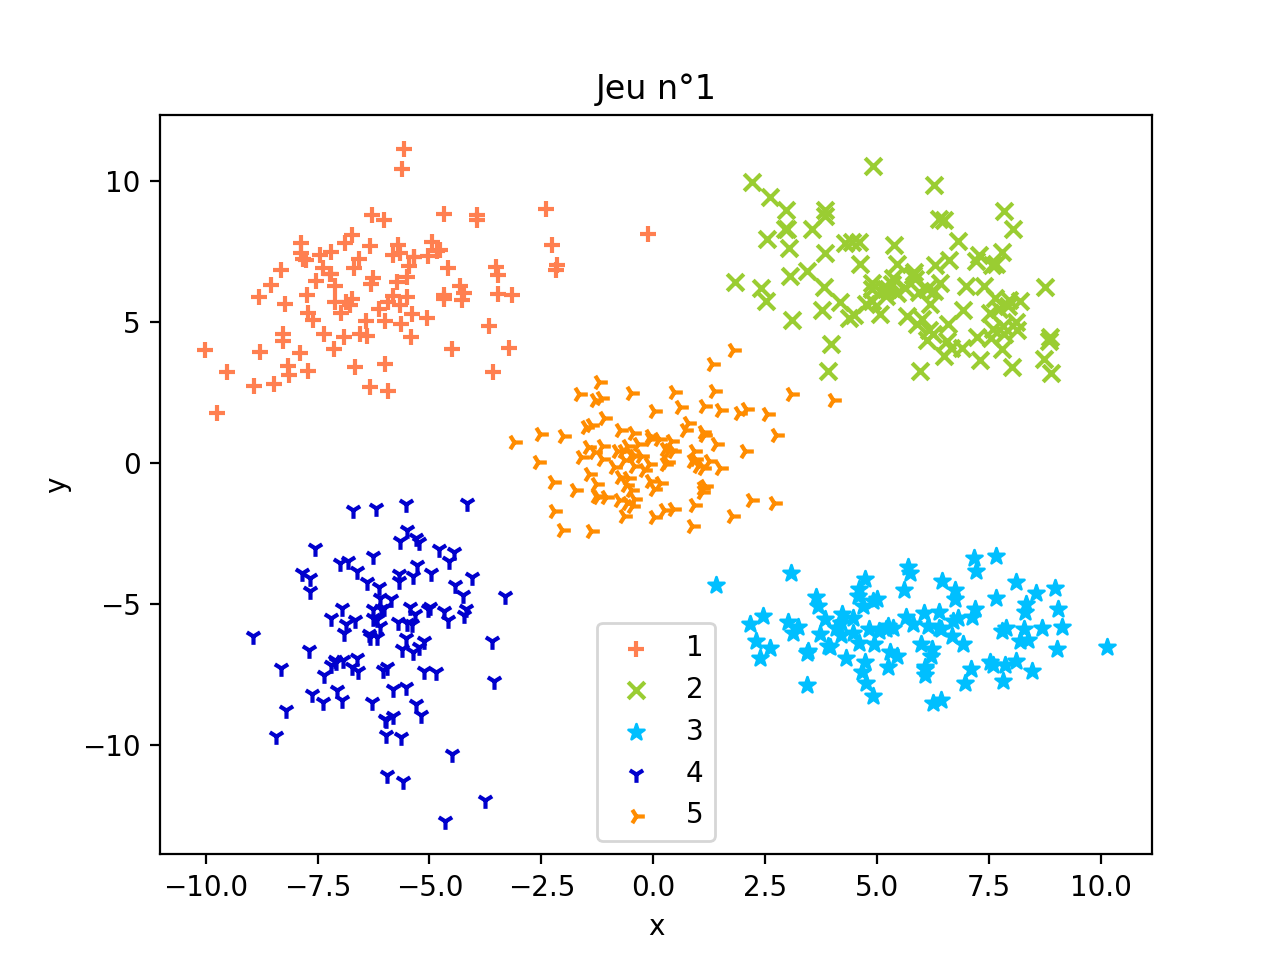

<IPython.core.display.Javascript object>


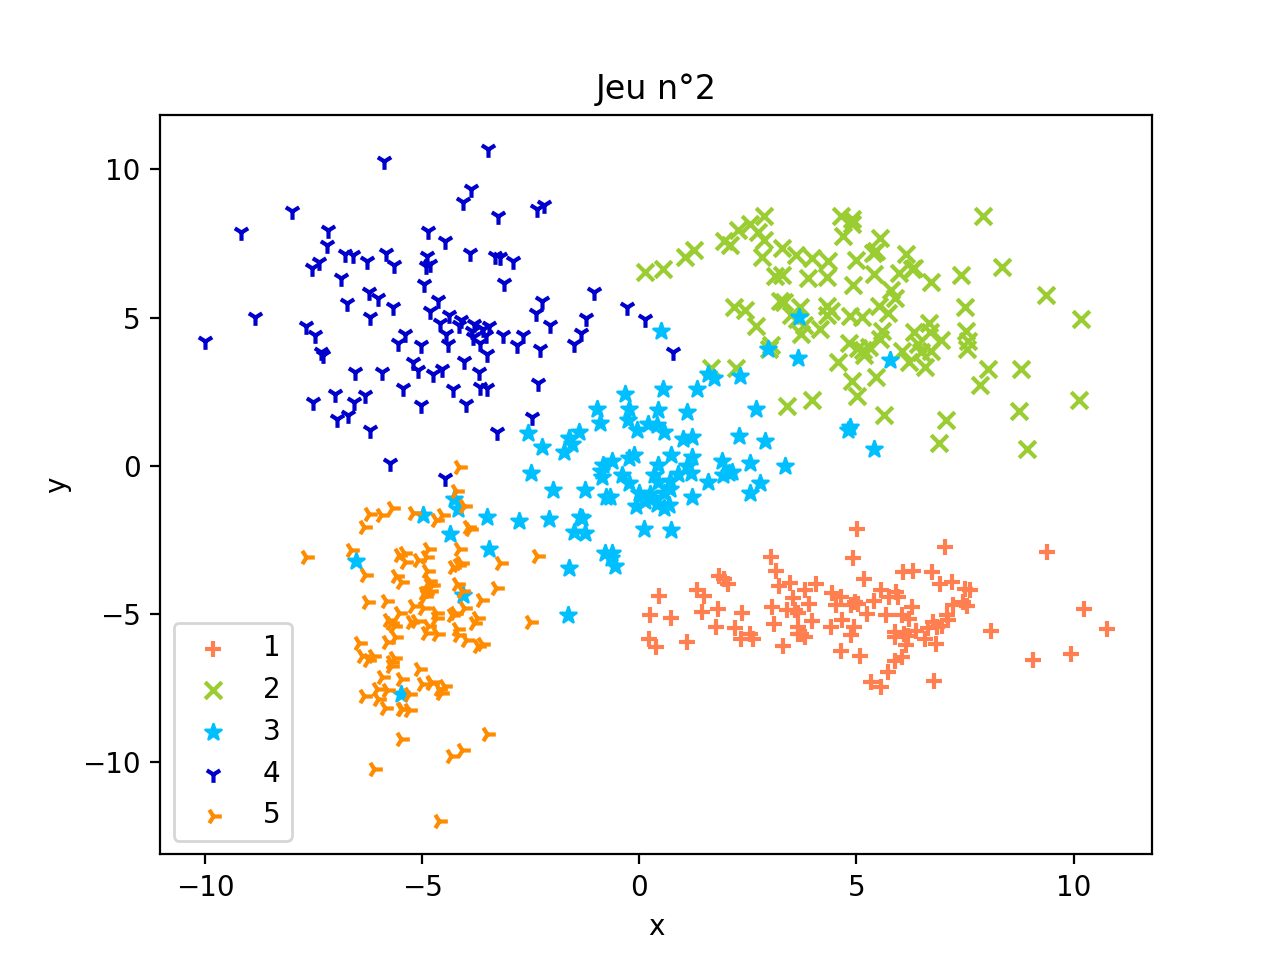

<IPython.core.display.Javascript object>


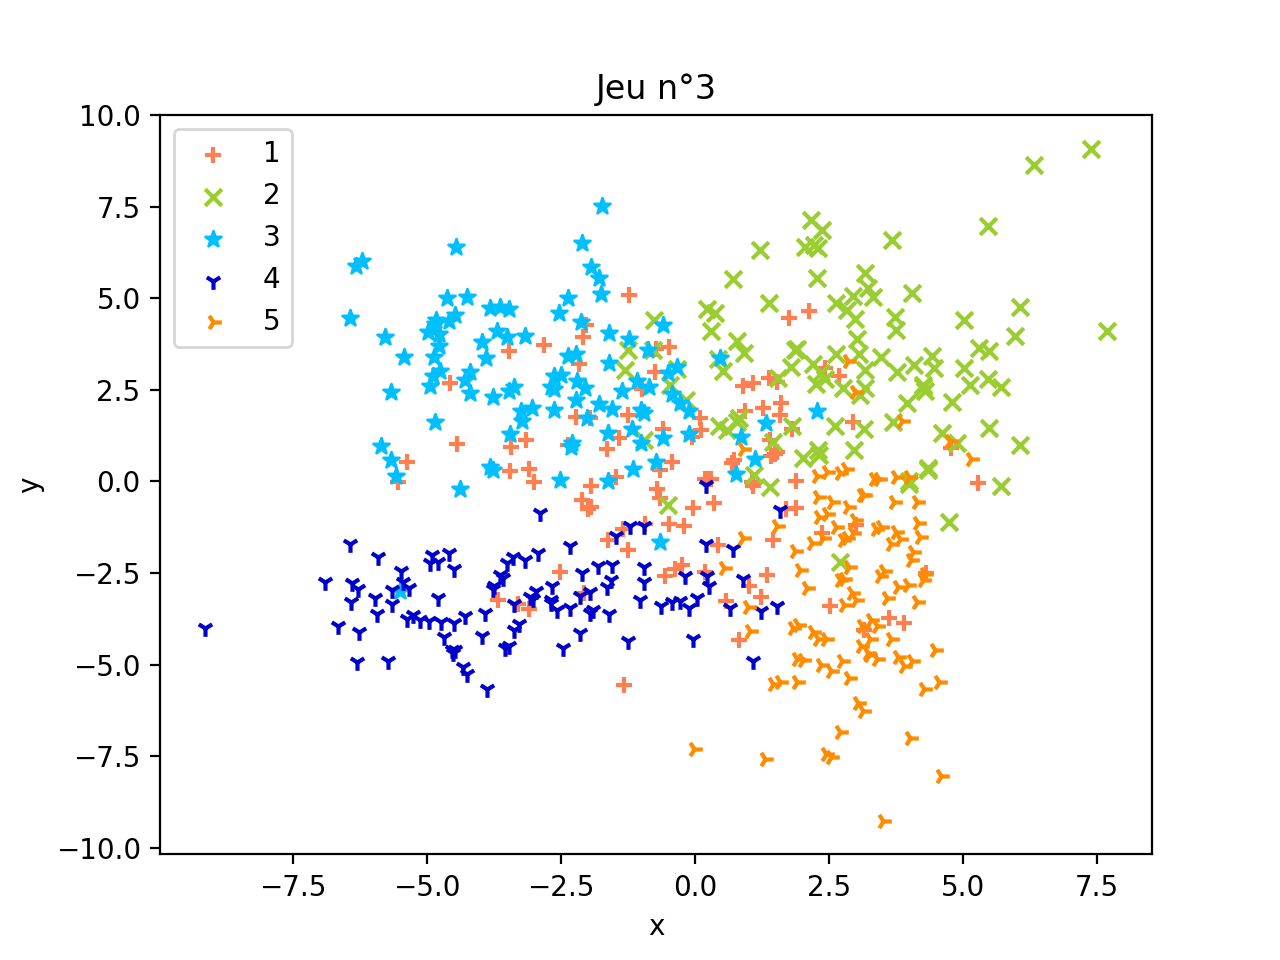

In [126]:
#Représentation des nuages des données des 3 jeux de données
markers = {1: '+', 2: 'x', 3: '*', 4: '1', 5: '4'}
colors = {1: 'coral', 2: 'yellowgreen', 3: 'deepskyblue', 4: 'mediumblue', 5: 'darkorange'}
plt.figure(1)
for kind in markers:
    d = df[df.Classe==kind]
    plt.scatter(d.x, d.y, 
                c = colors[kind],
                marker = markers[kind],label=kind)
plt.title("Jeu n°1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
markers = {1: '+', 2: 'x', 3: '*', 4: '1', 5: '4'}
colors = {1: 'coral', 2: 'yellowgreen', 3: 'deepskyblue', 4: 'mediumblue', 5: 'darkorange'}
plt.figure(2)
for kind in markers:
    d = df2[df2.Classe==kind]
    plt.scatter(d.x, d.y, 
                c = colors[kind],
                marker = markers[kind],label=kind)
plt.title("Jeu n°2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
markers = {1: '+', 2: 'x', 3: '*', 4: '1', 5: '4'}
colors = {1: 'coral', 2: 'yellowgreen', 3: 'deepskyblue', 4: 'mediumblue', 5: 'darkorange'}
plt.figure(3)
for kind in markers:
    d = df3[df3.Classe==kind]
    plt.scatter(d.x, d.y, 
                c = colors[kind],
                marker = markers[kind],label=kind)
plt.title("Jeu n°3")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [484]:
#chargement des données de test des 3 jeux de données
ft = open(r"C:\Users\surfaC\Desktop\Theorie decision\Partie 2\TP\data_tp1_dec.txt", "r")
ft2 = open(r"C:\Users\surfaC\Desktop\Theorie decision\Partie 2\TP\data_tp2_dec.txt", "r")
ft3 = open(r"C:\Users\surfaC\Desktop\Theorie decision\Partie 2\TP\data_tp3_dec.txt", "r")

In [218]:
dft = pd.DataFrame(columns=['Classe', 'x', 'y','ClassifTop1','ClassifTop2'])
dft2 = pd.DataFrame(columns=['Classe', 'x', 'y','ClassifTop1','ClassifTop2'])
dft3 = pd.DataFrame(columns=['Classe', 'x', 'y','ClassifTop1','ClassifTop2'])

In [354]:
dftm = pd.DataFrame(columns=['Classe', 'x', 'y','ClassifTop1M','ClassifTop2M','ClassifTop1FPU','ClassifTop2FPU','ClassifTop1FPG','ClassifTop2FPG'])
dftm2 = pd.DataFrame(columns=['Classe', 'x', 'y','ClassifTop1M','ClassifTop2M','ClassifTop1FPU','ClassifTop2FPU','ClassifTop1FPG','ClassifTop2FPG'])
dftm3 = pd.DataFrame(columns=['Classe', 'x', 'y','ClassifTop1M','ClassifTop2M','ClassifTop1FPU','ClassifTop2FPU','ClassifTop1FPG','ClassifTop2FPG'])

In [471]:
dftmk = pd.DataFrame(columns=['Classe', 'x', 'y','ClassifTop1kppv','ClassifTop2kppv'])
dftmk2 = pd.DataFrame(columns=['Classe', 'x', 'y','ClassifTop1kppv','ClassifTop2kppv'])
dftmk3 = pd.DataFrame(columns=['Classe', 'x', 'y','ClassifTop1kppv','ClassifTop2kppv'])

In [482]:
dftmk5 = pd.DataFrame(columns=['Classe', 'x', 'y','ClassifTop1kppv','ClassifTop2kppv'])
dftmk52 = pd.DataFrame(columns=['Classe', 'x', 'y','ClassifTop1kppv','ClassifTop2kppv'])
dftmk53 = pd.DataFrame(columns=['Classe', 'x', 'y','ClassifTop1kppv','ClassifTop2kppv'])

In [338]:
dftm5cvp = pd.DataFrame(columns=['Classe', 'x', 'y','ClassifTop1FPU','ClassifTop2FPU','ClassifTop1FPG','ClassifTop2FPG'])
dftm5cvp2 = pd.DataFrame(columns=['Classe', 'x', 'y','ClassifTop1FPU','ClassifTop2FPU','ClassifTop1FPG','ClassifTop2FPG'])
dftm5cvp3 = pd.DataFrame(columns=['Classe', 'x', 'y','ClassifTop1FPU','ClassifTop2FPU','ClassifTop1FPG','ClassifTop2FPG'])

In [223]:
#Classification DE des données de test pour les 3 jeux de données
for x in ft:
    v=x.split(" ")
    pointX=np.zeros((2,1))
    cls=int(v[0])
    pointX[0,0]=float(v[1])
    pointX[1,0]=float(v[2].split("\n")[0])
    new_row = {'Classe':cls, 'x':float(v[1]), 'y':float(v[2].split("\n")[0]),'ClassifTop1':ClassificationTOP2DE(pointX,df)[0],'ClassifTop2':ClassificationTOP2DE(pointX,df)[1]}
    dft = dft.append(new_row , ignore_index=True)
for x in ft2:
    v=x.split(" ")
    pointX=np.zeros((2,1))
    cls=int(v[0])
    pointX[0,0]=float(v[1])
    pointX[1,0]=float(v[2].split("\n")[0])
    new_row = {'Classe':cls, 'x':float(v[1]), 'y':float(v[2].split("\n")[0]),'ClassifTop1':ClassificationTOP2DE(pointX,df2)[0],'ClassifTop2':ClassificationTOP2DE(pointX,df2)[1]}
    dft2= dft2.append(new_row , ignore_index=True)
for x in ft3:
    v=x.split(" ")
    pointX=np.zeros((2,1))
    cls=int(v[0])
    pointX[0,0]=float(v[1])
    pointX[1,0]=float(v[2].split("\n")[0])
    new_row = {'Classe':cls, 'x':float(v[1]), 'y':float(v[2].split("\n")[0]),'ClassifTop1':ClassificationTOP2DE(pointX,df3)[0],'ClassifTop2':ClassificationTOP2DE(pointX,df3)[1]}
    dft3 = dft3.append(new_row , ignore_index=True)
ft.close()
ft2.close()
ft3.close()

In [224]:
print(dft)
print(dft2)
print(dft3)

     Classe         x         y  ClassifTop1  ClassifTop2
0       1.0 -4.840798  5.117552          1.0          5.0
1       1.0 -2.458894  5.701029          1.0          5.0
2       1.0 -5.195775  6.207984          1.0          5.0
3       1.0 -6.059512  4.324269          1.0          5.0
4       1.0 -5.864124  8.061702          1.0          5.0
..      ...       ...       ...          ...          ...
495     5.0 -0.532394 -0.478236          5.0          4.0
496     5.0 -0.596780 -1.310213          5.0          4.0
497     5.0  0.645414  0.058871          5.0          3.0
498     5.0  0.679295 -1.391780          5.0          3.0
499     5.0  0.998671  1.712854          5.0          2.0

[500 rows x 5 columns]
     Classe         x         y  ClassifTop1  ClassifTop2
0       1.0  1.438891 -5.008613          1.0          3.0
1       1.0  2.448843 -5.415434          1.0          3.0
2       1.0  4.098009 -4.950417          1.0          3.0
3       1.0  6.546202 -4.110581          1.0    

In [355]:
#Classification des jeux de test selon Malhanobis(ClassifTop1M , ClassifTop2M) et
#Parzen(ClassifTop1FPU, ClassifTop2FPU (Noyau Uniforme), ClassifTop1FPG, ClassifTop2FPG (Noyau Gaussien) ) des données test
for x in ft:
    v=x.split(" ")
    pointX=np.zeros((2,1))
    pointX[0,0]=float(v[1])
    pointX[1,0]=float(v[2].split("\n")[0])
    ClassifM=ClassificationTOP2Malh(pointX,df)
    ClassifNG=ClassificationNGaussienne(pointX,df,1)
    ClassifNU=ClassificationNUniforme(pointX,df,1)
    
    new_row = {'Classe':int(v[0]), 'x':float(v[1]), 'y':float(v[2].split("\n")[0]),'ClassifTop1M':ClassifM[0],'ClassifTop2M':ClassifM[1],'ClassifTop1FPU':ClassifNU[0],'ClassifTop2FPU':ClassifNU[1],'ClassifTop1FPG':ClassifNG[0],'ClassifTop2FPG':ClassifNG[1]}
    dftm = dftm.append(new_row , ignore_index=True)
for x in ft2:
    v=x.split(" ")
    pointX=np.zeros((2,1))
    pointX[0,0]=float(v[1])
    pointX[1,0]=float(v[2].split("\n")[0])
    ClassifM=ClassificationTOP2Malh(pointX,df2)
    ClassifNG=ClassificationNGaussienne(pointX,df2,1)
    ClassifNU=ClassificationNUniforme(pointX,df2,1)
    
    new_row = {'Classe':int(v[0]), 'x':float(v[1]), 'y':float(v[2].split("\n")[0]),'ClassifTop1M':ClassifM[0],'ClassifTop2M':ClassifM[1],'ClassifTop1FPU':ClassifNU[0],'ClassifTop2FPU':ClassifNU[1],'ClassifTop1FPG':ClassifNG[0],'ClassifTop2FPG':ClassifNG[1]}
    dftm2 = dftm2.append(new_row , ignore_index=True)
for x in ft3:
    v=x.split(" ")
    pointX=np.zeros((2,1))
    pointX[0,0]=float(v[1])
    pointX[1,0]=float(v[2].split("\n")[0])
    ClassifM=ClassificationTOP2Malh(pointX,df3)
    ClassifNG=ClassificationNGaussienne(pointX,df3,1)
    ClassifNU=ClassificationNUniforme(pointX,df3,1)
    
    new_row = {'Classe':int(v[0]), 'x':float(v[1]), 'y':float(v[2].split("\n")[0]),'ClassifTop1M':ClassifM[0],'ClassifTop2M':ClassifM[1],'ClassifTop1FPU':ClassifNU[0],'ClassifTop2FPU':ClassifNU[1],'ClassifTop1FPG':ClassifNG[0],'ClassifTop2FPG':ClassifNG[1]}
    dftm3 = dftm3.append(new_row , ignore_index=True)
ft.close()
ft2.close()
ft3.close()

In [356]:
print(dftm)
print(dftm2)
print(dftm3)

     Classe         x         y  ClassifTop1M  ClassifTop2M  ClassifTop1FPU  \
0       1.0 -4.840798  5.117552           1.0           4.0             1.0   
1       1.0 -2.458894  5.701029           1.0           5.0             1.0   
2       1.0 -5.195775  6.207984           1.0           4.0             1.0   
3       1.0 -6.059512  4.324269           1.0           4.0             1.0   
4       1.0 -5.864124  8.061702           1.0           4.0             1.0   
..      ...       ...       ...           ...           ...             ...   
495     5.0 -0.532394 -0.478236           5.0           4.0             5.0   
496     5.0 -0.596780 -1.310213           5.0           4.0             5.0   
497     5.0  0.645414  0.058871           5.0           3.0             5.0   
498     5.0  0.679295 -1.391780           5.0           3.0             5.0   
499     5.0  0.998671  1.712854           5.0           2.0             5.0   

     ClassifTop2FPU  ClassifTop1FPG  ClassifTop2FPG

In [474]:
#Classification des jeux de test selon Kppv k=1
for x in ft:
    v=x.split(" ")
    pointX=np.zeros((2,1))
    pointX[0,0]=float(v[1])
    pointX[1,0]=float(v[2].split("\n")[0])
    Classif=Classification_kppv(pointX,df,1)
    new_row = {'Classe':int(v[0]), 'x':float(v[1]), 'y':float(v[2].split("\n")[0]),'ClassifTop1kppv':Classif[0],'ClassifTop2kppv':Classif[1]}
    dftmk = dftmk.append(new_row , ignore_index=True)
for x in ft2:
    v=x.split(" ")
    pointX=np.zeros((2,1))
    pointX[0,0]=float(v[1])
    pointX[1,0]=float(v[2].split("\n")[0])
    Classif=Classification_kppv(pointX,df2,1)
    new_row = {'Classe':int(v[0]), 'x':float(v[1]), 'y':float(v[2].split("\n")[0]),'ClassifTop1kppv':Classif[0],'ClassifTop2kppv':Classif[1]}
    dftmk2 = dftmk2.append(new_row , ignore_index=True)
for x in ft3:
    v=x.split(" ")
    pointX=np.zeros((2,1))
    pointX[0,0]=float(v[1])
    pointX[1,0]=float(v[2].split("\n")[0])
    Classif=Classification_kppv(pointX,df3,1)
    new_row = {'Classe':int(v[0]), 'x':float(v[1]), 'y':float(v[2].split("\n")[0]),'ClassifTop1kppv':Classif[0],'ClassifTop2kppv':Classif[1]}
    dftmk3 = dftmk3.append(new_row , ignore_index=True)

In [475]:
print(dftmk)
print(dftmk2)
print(dftmk3)

     Classe         x         y  ClassifTop1kppv  ClassifTop2kppv
0       1.0 -4.840798  5.117552              1.0              1.0
1       1.0 -2.458894  5.701029              1.0              1.0
2       1.0 -5.195775  6.207984              1.0              1.0
3       1.0 -6.059512  4.324269              1.0              1.0
4       1.0 -5.864124  8.061702              1.0              1.0
..      ...       ...       ...              ...              ...
495     5.0 -0.532394 -0.478236              5.0              5.0
496     5.0 -0.596780 -1.310213              5.0              5.0
497     5.0  0.645414  0.058871              5.0              5.0
498     5.0  0.679295 -1.391780              5.0              5.0
499     5.0  0.998671  1.712854              5.0              5.0

[500 rows x 5 columns]
     Classe         x         y  ClassifTop1kppv  ClassifTop2kppv
0       1.0  1.438891 -5.008613              1.0              1.0
1       1.0  2.448843 -5.415434              1.0    

###  Résultat du classifieur de Distance euclidienne

In [1]:
#jeu 1:taux de classification TOP1 DE 
TCT1DE=(dft.loc[dft.ClassifTop1 == dft.Classe]).shape[0]*100/dft.shape[0]
print(TCT1DE)

NameError: name 'dft' is not defined

In [232]:
#jeu 1:taux d'erreur TOP1 DE
TET1DE=(dft.shape[0]-(dft.loc[dft.ClassifTop1 == dft.Classe]).shape[0])*100/dft.shape[0]
print(TET1DE)

0.8


In [233]:
#jeu 1:taux de classification TOP2 DE
TCT2DE=(dft.loc[(dft.ClassifTop1 == dft.Classe) | (dft.ClassifTop2 == dft.Classe)]).shape[0]*100/dft.shape[0]
print(TCT2DE)

100.0


In [234]:
#jeu 1:taux d'erreur TOP2 DE
TET2DE=(dft.shape[0]-(dft.loc[(dft.ClassifTop1 == dft.Classe) | (dft.ClassifTop2 == dft.Classe)]).shape[0])*100/dft.shape[0]
print(TET2DE)

0.0


In [235]:
#jeu 1:Matrice de confusion du classifieur DE 
MatriceConfusion(dft)

array([[ 98.,   0.,   0.,   0.,   2.],
       [  0., 100.,   0.,   0.,   0.],
       [  0.,   0.,  99.,   1.,   0.],
       [  0.,   0.,   0., 100.,   0.],
       [  1.,   0.,   0.,   0.,  99.]])

In [236]:
#jeu 2:taux de classification TOP1 DE 
TCT1DE2=(dft2.loc[dft2.ClassifTop1 == dft2.Classe]).shape[0]*100/dft2.shape[0]
print(TCT1DE2)

94.6


In [237]:
#jeu 2:taux d'erreur TOP1 DE
TET1DE2=(dft2.shape[0]-(dft2.loc[dft2.ClassifTop1 == dft2.Classe]).shape[0])*100/dft2.shape[0]
print(TET1DE2)

5.4


In [238]:
#jeu 2:taux de classification TOP2 DE
TCT2DE2=(dft2.loc[(dft2.ClassifTop1 == dft2.Classe) | (dft2.ClassifTop2 == dft2.Classe)]).shape[0]*100/dft2.shape[0]
print(TCT2DE2)

99.6


In [239]:
#jeu 2:taux d'erreur TOP2 DE
TET2DE2=(dft2.shape[0]-(dft2.loc[(dft2.ClassifTop1 == dft2.Classe) | (dft2.ClassifTop2 == dft2.Classe)]).shape[0])*100/dft2.shape[0]
print(TET2DE2)

0.4


In [240]:
#jeu 2:Matrice de confusion du classifieur DE 
MatriceConfusion(dft2)

array([[100.,   0.,   0.,   0.,   0.],
       [  2.,  97.,   1.,   0.,   0.],
       [  0.,   5.,  84.,   1.,  10.],
       [  0.,   0.,   6.,  94.,   0.],
       [  0.,   0.,   2.,   0.,  98.]])

In [241]:
#jeu 3:taux de classification TOP1 DE 
TCT1DE3=(dft3.loc[dft3.ClassifTop1 == dft3.Classe]).shape[0]*100/dft3.shape[0]
print(TCT1DE3)

72.8


In [242]:
#jeu 3:taux d'erreur TOP1 DE
TET1DE3=(dft3.shape[0]-(dft3.loc[dft3.ClassifTop1 == dft3.Classe]).shape[0])*100/dft3.shape[0]
print(TET1DE3)

27.2


In [243]:
#jeu 3:taux de classification TOP2 DE
TCT2DE3=(dft3.loc[(dft3.ClassifTop1 == dft3.Classe) | (dft3.ClassifTop2 == dft3.Classe)]).shape[0]*100/dft3.shape[0]
print(TCT2DE3)

89.2


In [244]:
#jeu 3:taux d'erreur TOP2 DE
TET2DE3=(dft3.shape[0]-(dft3.loc[(dft3.ClassifTop1 == dft3.Classe) | (dft3.ClassifTop2 == dft3.Classe)]).shape[0])*100/dft3.shape[0]
print(TET2DE3)

10.8


In [245]:
#jeu 3:Matrice de confusion du classifieur DE 
MatriceConfusion(dft3)

array([[43., 17., 16., 12., 12.],
       [12., 83.,  3.,  0.,  2.],
       [16.,  4., 78.,  2.,  0.],
       [16.,  0.,  7., 74.,  3.],
       [ 5.,  9.,  0.,  0., 86.]])

### le classifieur DE est beaucoup plus avantageux pour le jeu 1 et 2 ayant un taux de classification respectif 99,2% et 94,6% quant au jeu 3 on a obtenu 72,8%
### Les matrices de confusion sont conformes aux taux obtenus

###   Résultat du classifieur selon distance de Malhanobis

In [357]:
# Jeu 1:taux de classification TOP1 Malhanobis
TCT1M=(dftm.loc[dftm.ClassifTop1M == dftm.Classe]).shape[0]*100/dftm.shape[0]
TCT1M

99.4

In [358]:
#Jeu 1:taux d'erreur TOP1 Malhanobis
TET1M=(dftm.shape[0]-(dftm.loc[dftm.ClassifTop1M == dftm.Classe]).shape[0])*100/dftm.shape[0]
TET1M

0.6

In [359]:
#Jeu 1:taux de classification TOP2 Malhanobis
TCT2M=(dftm.loc[(dftm.ClassifTop1M == dftm.Classe) | (dftm.ClassifTop2M == dftm.Classe)]).shape[0]*100/dftm.shape[0]
TCT2M

99.8

In [360]:
#Jeu 1:taux d'erreur TOP2 Malhanobis
TET2M=(dftm.shape[0]-(dftm.loc[(dftm.ClassifTop1M == dftm.Classe) | (dftm.ClassifTop2M == dftm.Classe)]).shape[0])*100/dftm.shape[0]
TET2M

0.2

In [361]:
#Jeu 1:Matrice de confusion du classifieur Malhanobis
MatriceConfusionM(dftm)

array([[ 98.,   0.,   0.,   0.,   2.],
       [  0., 100.,   0.,   0.,   0.],
       [  0.,   0., 100.,   0.,   0.],
       [  0.,   0.,   0., 100.,   0.],
       [  0.,   0.,   0.,   1.,  99.]])

In [362]:
# Jeu 2:taux de classification TOP1 Malhanobis
TCT1M2=(dftm2.loc[dftm2.ClassifTop1M == dftm2.Classe]).shape[0]*100/dftm2.shape[0]
TCT1M2

88.8

In [363]:
#Jeu 2:taux d'erreur TOP1 Malhanobis
TET1M2=(dftm2.shape[0]-(dftm2.loc[dftm2.ClassifTop1M == dftm2.Classe]).shape[0])*100/dftm2.shape[0]
TET1M2

11.2

In [364]:
#Jeu 2:taux de classification TOP2 Malhanobis
TCT2M2=(dftm2.loc[(dftm2.ClassifTop1M == dftm2.Classe) | (dftm2.ClassifTop2M == dftm2.Classe)]).shape[0]*100/dftm2.shape[0]
TCT2M2

98.4

In [365]:
#Jeu 2:taux d'erreur TOP2 Malhanobis
TET2M2=(dftm2.shape[0]-(dftm2.loc[(dftm2.ClassifTop1M == dftm2.Classe) | (dftm2.ClassifTop2M == dftm2.Classe)]).shape[0])*100/dftm2.shape[0]
TET2M2

1.6

In [366]:
#Jeu 2:Matrice de confusion du classifieur Malhanobis
MatriceConfusionM(dftm2)

array([[100.,   0.,   0.,   0.,   0.],
       [  0.,  96.,   4.,   0.,   0.],
       [  4.,   5.,  75.,   0.,  16.],
       [  0.,   1.,   3.,  74.,  22.],
       [  1.,   0.,   0.,   0.,  99.]])

In [367]:
# Jeu 3:taux de classification TOP1 Malhanobis
TCT1M3=(dftm3.loc[dftm3.ClassifTop1M == dftm3.Classe]).shape[0]*100/dftm3.shape[0]
TCT1M3

58.2

In [368]:
#Jeu 3:taux d'erreur TOP1 Malhanobis
TET1M3=(dftm3.shape[0]-(dftm3.loc[dftm3.ClassifTop1M == dftm3.Classe]).shape[0])*100/dftm3.shape[0]
TET1M3

41.8

In [369]:
#Jeu 3:taux de classification TOP2 Malhanobis
TCT2M3=(dftm3.loc[(dftm3.ClassifTop1M == dftm3.Classe) | (dftm3.ClassifTop2M == dftm3.Classe)]).shape[0]*100/dftm3.shape[0]
TCT2M3

74.6

In [370]:
#Jeu 3:taux d'erreur TOP2 Malhanobis
TET2M3=(dftm3.shape[0]-(dftm3.loc[(dftm3.ClassifTop1M == dftm3.Classe) | (dftm3.ClassifTop2M == dftm3.Classe)]).shape[0])*100/dftm3.shape[0]
TET2M3

25.4

In [371]:
#Jeu 3:Matrice de confusion du classifieur Malhanobis
MatriceConfusionM(dftm3)

array([[ 0.,  1., 37., 26., 36.],
       [ 0., 16., 18.,  2., 64.],
       [ 0.,  0., 90.,  5.,  5.],
       [ 0.,  0., 12., 86.,  2.],
       [ 0.,  0.,  0.,  1., 99.]])

### le classifieur Malhanobis est beaucoup plus avantageux pour le jeu 1 et 2 ayant un taux de classification respectif 99,4% et 88,8% quant au jeu 3 on a obtenu 58,2%
### Les matrices de confusion sont conformes aux taux obtenus
### Pour tout les jeux de données la matrice de confusuion démontre que le classifieur malhanobis arrive à classifier correctement les données de laclasse 5

### Résultat du classifieur Parzen Cas Uniforme/ Gaussien

In [372]:
#Jeu 1:taux de classification TOP1 Parzen Cas Uniforme
TCT1PU=(dftm.loc[dftm.ClassifTop1FPU == dftm.Classe]).shape[0]*100/dftm.shape[0]
TCT1PU

95.4

In [373]:
#Jeu 1:taux d'erreur TOP1 Parzen Cas Uniforme
TET1PU=(dftm.shape[0]-(dftm.loc[dftm.ClassifTop1FPU == dftm.Classe]).shape[0])*100/dftm.shape[0]
TET1PU

4.6

In [374]:
#Jeu 1:taux de classification TOP2 Parzen Cas Uniforme
TCT2PU=(dftm.loc[(dftm.ClassifTop1FPU == dftm.Classe) | (dftm.ClassifTop2FPU == dftm.Classe)]).shape[0]*100/dftm.shape[0]
TCT2PU

95.6

In [375]:
#Jeu 1:taux d'erreur TOP2 Parzen Cas Uniforme
TET2PU=(dftm.shape[0]-(dftm.loc[(dftm.ClassifTop1FPU == dftm.Classe) | (dftm.ClassifTop2FPU == dftm.Classe)]).shape[0])*100/dftm.shape[0]
TET2PU

4.4

In [376]:
#Jeu 1:Matrice de confusion du classifieur Parzen Cas Uniforme
MatriceConfusionPNU(dftm)

array([[99.,  0.,  0.,  0.,  1.],
       [11., 89.,  0.,  0.,  0.],
       [ 5.,  0., 95.,  0.,  0.],
       [ 1.,  0.,  0., 99.,  0.],
       [ 5.,  0.,  0.,  0., 95.]])

In [377]:
#Jeu 1:taux de classification TOP1 Parzen Cas Gaussien
TCT1PG=(dftm.loc[dftm.ClassifTop1FPG == dftm.Classe]).shape[0]*100/dftm.shape[0]
TCT1PG

99.4

In [378]:
#Jeu 1:taux d'erreur TOP1 Parzen Cas Gaussien
TET1PG=(dftm.shape[0]-(dftm.loc[dftm.ClassifTop1FPG == dftm.Classe]).shape[0])*100/dftm.shape[0]
TET1PG

0.6

In [379]:
#Jeu 1:taux de classification TOP2 Parzen Cas Gaussien
TCT2PG=(dftm.loc[(dftm.ClassifTop1FPG == dftm.Classe) | (dftm.ClassifTop2FPG == dftm.Classe)]).shape[0]*100/dftm.shape[0]
TCT2PG

99.8

In [380]:
#Jeu 1:taux d'erreur TOP2 Parzen Cas Gaussien
TET2PG=(dftm.shape[0]-(dftm.loc[(dftm.ClassifTop1FPG == dftm.Classe) | (dftm.ClassifTop2FPG == dftm.Classe)]).shape[0])*100/dftm.shape[0]
TET2PG

0.2

In [381]:
#Jeu 1:Matrice de confusion du classifieur Parzen Cas Gaussien
MatriceConfusionPNG(dftm)

array([[ 98.,   0.,   0.,   0.,   2.],
       [  0., 100.,   0.,   0.,   0.],
       [  0.,   0., 100.,   0.,   0.],
       [  0.,   0.,   0., 100.,   0.],
       [  0.,   0.,   0.,   1.,  99.]])

[70.2, 93.6, 98.2, 99.4, 99.8, 99.8, 99.8, 99.6, 99.4, 99.6, 99.6, 99.2, 99.2, 96.8, 20.0]
[99.6, 99.8, 99.8, 99.8, 99.8, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.4, 99.4, 99.4, 99.4]


<IPython.core.display.Javascript object>


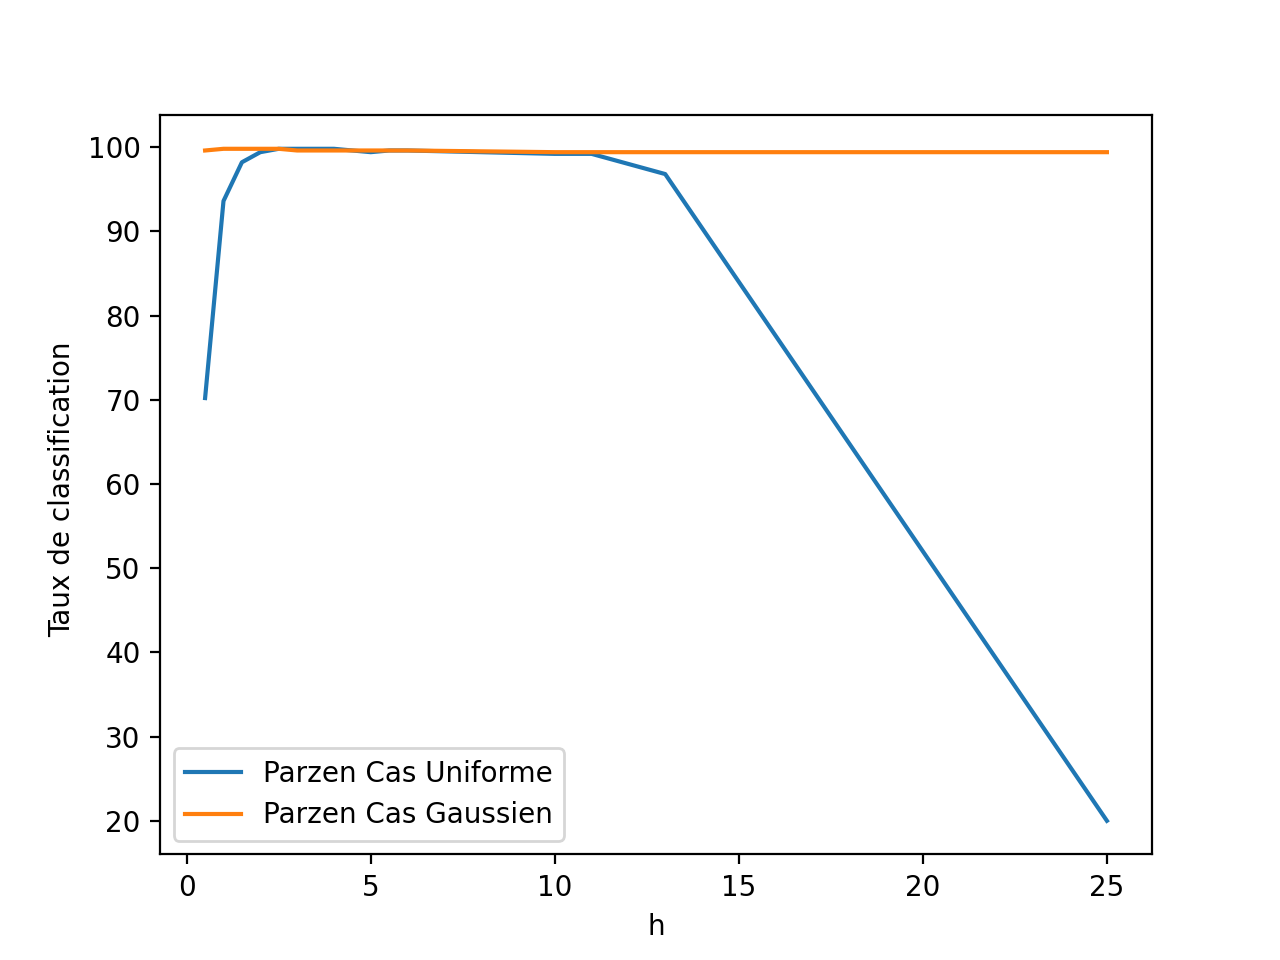

In [382]:
# Jeu 1:5CV Parzen
h=[0.5,1,1.5,2,2.5,3,4,4.5,5,5.5,6,10,11,13,25]
C=cinqCV_Parzen(df,h)
print(C[0])
print(C[1])
plt.figure(4)
plt.plot(h,C[0],label="Parzen Cas Uniforme")
plt.plot(h,C[1],label="Parzen Cas Gaussien")
plt.xlabel("h")
plt.ylabel("Taux de classification ")
plt.legend()
plt.show()

<font size="5" color="blue" >  <strong> La valeur de h est 2.5 pour le noyau uniforme et est 1 pour le noyau gaussien , étant donné qu\'on obtient la valeur maximale en terme du taux de classification

In [388]:
#Jeu 1:Classification Parzen Cas Uniforme/Gaussien avec l'hyperparamètre h =2.5/h=1
for x in ft:
    v=x.split(" ")
    pointX=np.zeros((2,1))
    pointX[0,0]=float(v[1])
    pointX[1,0]=float(v[2].split("\n")[0])
    ClassifNG=ClassificationNGaussienne(pointX,df,1)
    ClassifNU=ClassificationNUniforme(pointX,df,2.5)
    
    new_row = {'Classe':int(v[0]), 'x':float(v[1]), 'y':float(v[2].split("\n")[0]),'ClassifTop1FPU':ClassifNU[0],'ClassifTop2FPU':ClassifNU[1],'ClassifTop1FPG':ClassifNG[0],'ClassifTop2FPG':ClassifNG[1]}
    dftm5cvp = dftm5cvp.append(new_row , ignore_index=True)

In [389]:
#Jeu 1:taux de classification TOP1 Parzen Cas Uniforme avec l'hyperparamètre h =2.5
TCT1PU5cvp=(dftm5cvp.loc[dftm5cvp.ClassifTop1FPU == dftm5cvp.Classe]).shape[0]*100/dftm5cvp.shape[0]
TCT1PU5cvp

99.0

In [390]:
#Jeu 1:taux d'erreur TOP1 Parzen Cas Uniforme  avec l'hyperparamètre h =2.5
TET1PU5cvp=(dftm5cvp.shape[0]-(dftm5cvp.loc[dftm5cvp.ClassifTop1FPU == dftm5cvp.Classe]).shape[0])*100/dftm5cvp.shape[0]
TET1PU5cvp

1.0

In [391]:
#Jeu 1:taux de classification TOP2 Parzen Cas Uniforme  avec l'hyperparamètre h =2.5
TCT2PU5cvp=(dftm5cvp.loc[(dftm5cvp.ClassifTop1FPU == dftm5cvp.Classe) | (dftm5cvp.ClassifTop2FPU == dftm5cvp.Classe)]).shape[0]*100/dftm5cvp.shape[0]
TCT2PU5cvp

99.4

In [392]:
#Jeu 1:taux d'erreur TOP2 Parzen Cas Uniforme  avec l'hyperparamètre h =2.5
TET2PU5cvp=(dftm5cvp.shape[0]-(dftm5cvp.loc[(dftm5cvp.ClassifTop1FPU == dftm5cvp.Classe) | (dftm5cvp.ClassifTop2FPU == dftm5cvp.Classe)]).shape[0])*100/dftm5cvp.shape[0]
TET2PU5cvp

0.6

In [394]:
#Jeu 1:Matrice de confusion du classifieur Parzen Cas Uniforme  avec l'hyperparamètre h =2.5
MatriceConfusionPNU(dftm5cvp)

array([[ 98.,   0.,   0.,   0.,   2.],
       [  1.,  99.,   0.,   0.,   0.],
       [  1.,   0.,  99.,   0.,   0.],
       [  0.,   0.,   0., 100.,   0.],
       [  1.,   0.,   0.,   0.,  99.]])

In [395]:
#Jeu 1:taux de classification TOP1 Parzen Cas Gaussien  avec l'hyperparamètre h =1
TCT1PG5cvp=(dftm5cvp.loc[dftm5cvp.ClassifTop1FPG == dftm5cvp.Classe]).shape[0]*100/dftm5cvp.shape[0]
TCT1PG5cvp

99.4

In [396]:
#Jeu 1:taux d'erreur TOP1 Parzen Cas Gaussien  avec l'hyperparamètre h =1
TET1PG5cvp=(dftm5cvp.shape[0]-(dftm5cvp.loc[dftm5cvp.ClassifTop1FPG == dftm5cvp.Classe]).shape[0])*100/dftm5cvp.shape[0]
TET1PG5cvp

0.6

In [397]:
#Jeu 1:taux de classification TOP2 Parzen Cas Gaussien  avec l'hyperparamètre h =1
TCT2PG5cvp=(dftm5cvp.loc[(dftm5cvp.ClassifTop1FPG == dftm5cvp.Classe) | (dftm5cvp.ClassifTop2FPG == dftm5cvp.Classe)]).shape[0]*100/dftm5cvp.shape[0]
TCT2PG5cvp

99.8

In [398]:
#Jeu 1:taux d'erreur TOP2 Parzen Cas Gaussien  avec l'hyperparamètre h =1
TET2PG5cvp=(dftm5cvp.shape[0]-(dftm5cvp.loc[(dftm5cvp.ClassifTop1FPG == dftm5cvp.Classe) | (dftm5cvp.ClassifTop2FPG == dftm5cvp.Classe)]).shape[0])*100/dftm5cvp.shape[0]
TET2PG5cvp

0.2

In [399]:
#Jeu 1:Matrice de confusion du classifieur Parzen Cas Gaussien  avec l'hyperparamètre h =1
MatriceConfusionPNG(dftm5cvp)

array([[ 98.,   0.,   0.,   0.,   2.],
       [  0., 100.,   0.,   0.,   0.],
       [  0.,   0., 100.,   0.,   0.],
       [  0.,   0.,   0., 100.,   0.],
       [  0.,   0.,   0.,   1.,  99.]])

### 

In [400]:
#Jeu 2:taux de classification TOP1 Parzen Cas Uniforme
TCT1PU2=(dftm2.loc[dftm2.ClassifTop1FPU == dftm2.Classe]).shape[0]*100/dftm2.shape[0]
TCT1PU2

90.4

In [401]:
#Jeu 2:taux d'erreur TOP1 Parzen Cas Uniforme
TET1PU2=(dftm2.shape[0]-(dftm2.loc[dftm2.ClassifTop1FPU == dftm2.Classe]).shape[0])*100/dftm2.shape[0]
TET1PU2

9.6

In [402]:
#Jeu 2:taux de classification TOP2 Parzen Cas Uniforme
TCT2PU2=(dftm2.loc[(dftm2.ClassifTop1FPU == dftm2.Classe) | (dftm2.ClassifTop2FPU == dftm2.Classe)]).shape[0]*100/dftm2.shape[0]
TCT2PU2

92.6

In [403]:
#Jeu 2:taux d'erreur TOP2 Parzen Cas Uniforme
TET2PU2=(dftm2.shape[0]-(dftm2.loc[(dftm2.ClassifTop1FPU == dftm2.Classe) | (dftm2.ClassifTop2FPU == dftm2.Classe)]).shape[0])*100/dftm2.shape[0]
TET2PU2

7.4

In [404]:
#Jeu 2:Matrice de confusion du classifieur Parzen Cas Uniforme
MatriceConfusionPNU(dftm2)

array([[100.,   0.,   0.,   0.,   0.],
       [  8.,  90.,   2.,   0.,   0.],
       [  6.,   4.,  82.,   2.,   6.],
       [ 10.,   0.,   4.,  86.,   0.],
       [  3.,   0.,   3.,   0.,  94.]])

In [405]:
#Jeu 2:taux de classification TOP1 Parzen Cas Gaussien
TCT1PG2=(dftm2.loc[dftm2.ClassifTop1FPG == dftm2.Classe]).shape[0]*100/dftm2.shape[0]
TCT1PG2

95.0

In [406]:
#Jeu 2:taux d'erreur TOP1 Parzen Cas Gaussien
TET1PG2=(dftm2.shape[0]-(dftm2.loc[dftm2.ClassifTop1FPG == dftm2.Classe]).shape[0])*100/dftm2.shape[0]
TET1PG2

5.0

In [407]:
#Jeu 2:taux de classification TOP2 Parzen Cas Gaussien
TCT2PG2=(dftm2.loc[(dftm2.ClassifTop1FPG == dftm2.Classe) | (dftm2.ClassifTop2FPG == dftm2.Classe)]).shape[0]*100/dftm2.shape[0]
TCT2PG2

99.6

In [408]:
#Jeu 2:taux d'erreur TOP2 Parzen Cas Gaussien
TET2PG2=(dftm2.shape[0]-(dftm2.loc[(dftm2.ClassifTop1FPG == dftm2.Classe) | (dftm2.ClassifTop2FPG == dftm2.Classe)]).shape[0])*100/dftm2.shape[0]
TET2PG2

0.4

In [409]:
#Jeu 2:Matrice de confusion du classifieur Parzen Cas Gaussien
MatriceConfusionPNG(dftm2)

array([[99.,  0.,  1.,  0.,  0.],
       [ 0., 98.,  2.,  0.,  0.],
       [ 1.,  5., 83.,  1., 10.],
       [ 0.,  0.,  3., 96.,  1.],
       [ 0.,  0.,  1.,  0., 99.]])

[61.0, 86.4, 91.2, 93.6, 93.8, 94.6, 94.4, 95.0, 94.6, 94.6, 94.0, 92.0, 91.4, 87.8, 20.0]
[92.8, 94.6, 94.8, 94.6, 94.8, 95.0, 94.6, 94.6, 94.4, 94.4, 94.4, 94.4, 94.4, 94.2, 94.4]


<IPython.core.display.Javascript object>


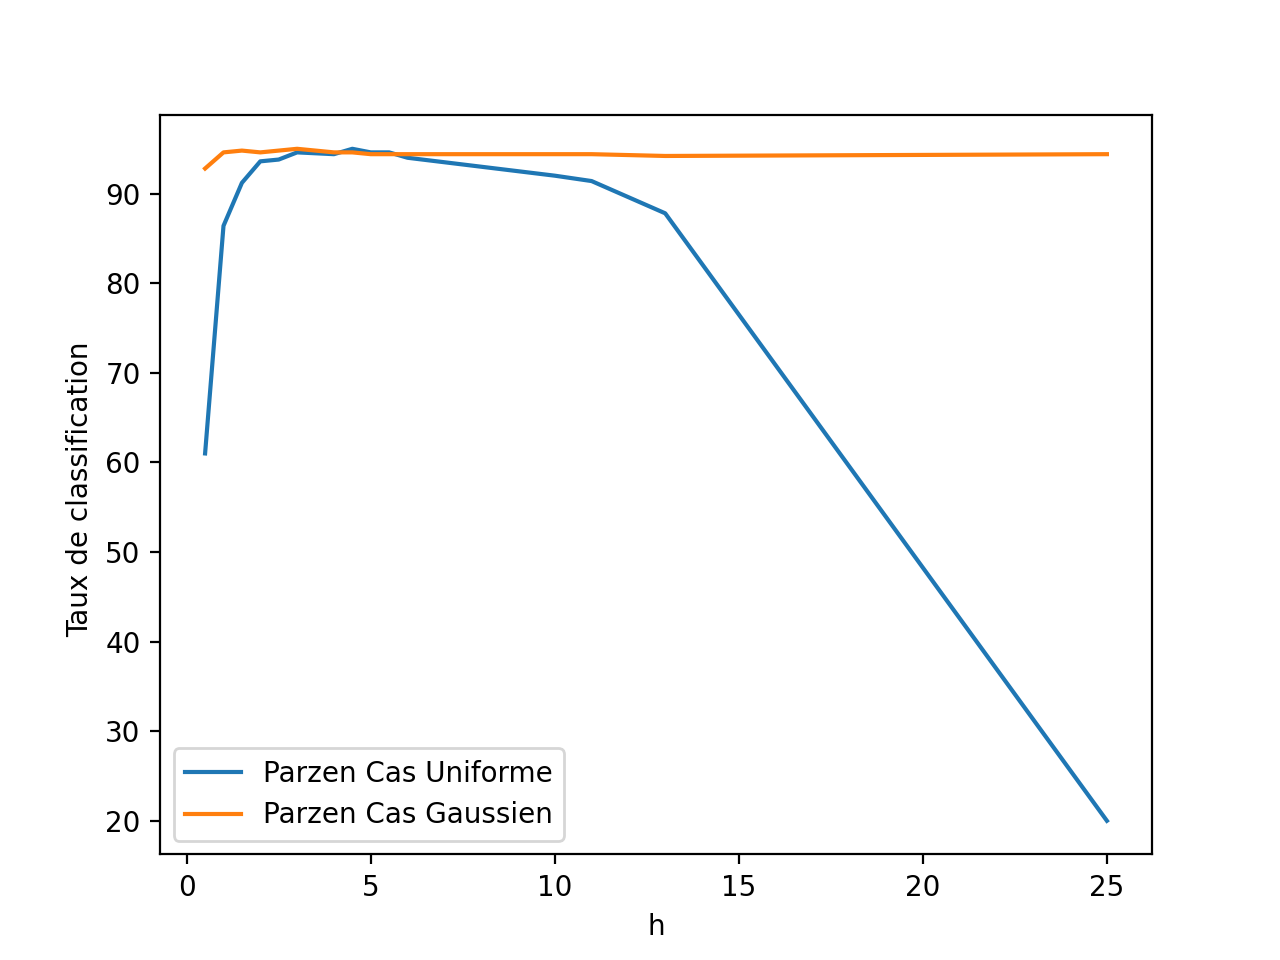

In [410]:
# Jeu 2:5CV Parzen
h=[0.5,1,1.5,2,2.5,3,4,4.5,5,5.5,6,10,11,13,25]
C=cinqCV_Parzen(df2,h)
print(C[0])
print(C[1])
plt.figure(5)
plt.plot(h,C[0],label="Parzen Cas Uniforme")
plt.plot(h,C[1],label="Parzen Cas Gaussien")
plt.xlabel("h")
plt.ylabel("Taux de classification ")
plt.legend()
plt.show()

<font size="5" color="blue" >  <strong>La valeur de h est 4,5 pour le noyau uniforme et est 3 pour le noyau gaussien, étant donné qu'on obtient la valeur maximale en terme du taux de classification

In [411]:
#Jeu 2:Classification Parzen Cas Uniforme/Gaussien avec l'hyperparamètre h = 4,5 /h=3
for x in ft2:
    v=x.split(" ")
    pointX=np.zeros((2,1))
    pointX[0,0]=float(v[1])
    pointX[1,0]=float(v[2].split("\n")[0])
    ClassifNG=ClassificationNGaussienne(pointX,df2,3)
    ClassifNU=ClassificationNUniforme(pointX,df2,4.5)
    
    new_row = {'Classe':int(v[0]), 'x':float(v[1]), 'y':float(v[2].split("\n")[0]),'ClassifTop1FPU':ClassifNU[0],'ClassifTop2FPU':ClassifNU[1],'ClassifTop1FPG':ClassifNG[0],'ClassifTop2FPG':ClassifNG[1]}
    dftm5cvp2 = dftm5cvp2.append(new_row , ignore_index=True)

In [412]:
#Jeu 2:taux de classification TOP1 Parzen Cas Uniforme avec l'hyperparamètre h = 4.5
TCT1PU5cvp2=(dftm5cvp2.loc[dftm5cvp2.ClassifTop1FPU == dftm5cvp2.Classe]).shape[0]*100/dftm5cvp2.shape[0]
TCT1PU5cvp2

95.2

In [413]:
#Jeu 2:taux d'erreur TOP1 Parzen Cas Uniforme  avec l'hyperparamètre h =4.5
TET1PU5cvp2=(dftm5cvp2.shape[0]-(dftm5cvp2.loc[dftm5cvp2.ClassifTop1FPU == dftm5cvp2.Classe]).shape[0])*100/dftm5cvp2.shape[0]
TET1PU5cvp2

4.8

In [414]:
#Jeu 2:taux de classification TOP2 Parzen Cas Uniforme  avec l'hyperparamètre h = 4.5
TCT2PU5cvp2=(dftm5cvp2.loc[(dftm5cvp2.ClassifTop1FPU == dftm5cvp2.Classe) | (dftm5cvp2.ClassifTop2FPU == dftm5cvp2.Classe)]).shape[0]*100/dftm5cvp2.shape[0]
TCT2PU5cvp2

99.6

In [415]:
#Jeu 2:taux d'erreur TOP2 Parzen Cas Uniforme  avec l'hyperparamètre h = 4.5
TET2PU5cvp2=(dftm5cvp2.shape[0]-(dftm5cvp2.loc[(dftm5cvp2.ClassifTop1FPU == dftm5cvp2.Classe) | (dftm5cvp2.ClassifTop2FPU == dftm5cvp2.Classe)]).shape[0])*100/dftm5cvp2.shape[0]
TET2PU5cvp2

0.4

In [416]:
#Jeu 2:Matrice de confusion du classifieur Parzen Cas Uniforme avec l'hyperparamètre h = 4.5
MatriceConfusionPNU(dftm2)

array([[100.,   0.,   0.,   0.,   0.],
       [  8.,  90.,   2.,   0.,   0.],
       [  6.,   4.,  82.,   2.,   6.],
       [ 10.,   0.,   4.,  86.,   0.],
       [  3.,   0.,   3.,   0.,  94.]])

In [417]:
#Jeu 2:taux de classification TOP1 Parzen Cas Gaussien  avec l'hyperparamètre h =3
TCT1PGcvp2=(dftm5cvp2.loc[dftm5cvp2.ClassifTop1FPG == dftm5cvp2.Classe]).shape[0]*100/dftm5cvp2.shape[0]
TCT1PGcvp2

95.0

In [418]:
#Jeu 2:taux d'erreur TOP1 Parzen Cas Gaussien  avec l'hyperparamètre h =3
TET1PGcvp2=(dftm5cvp2.shape[0]-(dftm5cvp2.loc[dftm5cvp.ClassifTop1FPG == dftm5cvp2.Classe]).shape[0])*100/dftm5cvp2.shape[0]
TET1PGcvp2

0.6

In [419]:
#Jeu 2:taux de classification TOP2 Parzen Cas Gaussien  avec l'hyperparamètre h =3
TCT2PG5cvp2=(dftm5cvp2.loc[(dftm5cvp2.ClassifTop1FPG == dftm5cvp2.Classe) | (dftm5cvp2.ClassifTop2FPG == dftm5cvp2.Classe)]).shape[0]*100/dftm5cvp2.shape[0]
TCT2PG5cvp2

99.6

In [420]:
#Jeu 2:taux d'erreur TOP2 Parzen Cas Gaussien  avec l'hyperparamètre h =3
TET2PG5cvp2=(dftm5cvp2.shape[0]-(dftm5cvp2.loc[(dftm5cvp2.ClassifTop1FPG == dftm5cvp2.Classe) | (dftm5cvp2.ClassifTop2FPG == dftm5cvp2.Classe)]).shape[0])*100/dftm5cvp2.shape[0]
TET2PG5cvp2

0.4

In [421]:
#Jeu 2:Matrice de confusion du classifieur Parzen Cas Gaussien  avec l'hyperparamètre h =3
MatriceConfusionPNG(dftm5cvp2)

array([[100.,   0.,   0.,   0.,   0.],
       [  0.,  98.,   2.,   0.,   0.],
       [  0.,   5.,  82.,   1.,  12.],
       [  0.,   0.,   4.,  96.,   0.],
       [  0.,   0.,   1.,   0.,  99.]])

In [422]:
#Jeu 3:taux de classification TOP1 Parzen Cas Uniforme
TCT1PU3=(dftm3.loc[dftm3.ClassifTop1FPU == dftm3.Classe]).shape[0]*100/dftm3.shape[0]
TCT1PU3

62.8

In [423]:
#Jeu 3:taux d'erreur TOP1 Parzen Cas Uniforme
TET1PU3=(dftm3.shape[0]-(dftm3.loc[dftm3.ClassifTop1FPU == dftm3.Classe]).shape[0])*100/dftm3.shape[0]
TET1PU3

37.2

In [424]:
#Jeu 3:taux de classification TOP2 Parzen Cas Uniforme
TCT2PU3=(dftm3.loc[(dftm3.ClassifTop1FPU == dftm3.Classe) | (dftm3.ClassifTop2FPU == dftm3.Classe)]).shape[0]*100/dftm3.shape[0]
TCT2PU3

80.6

In [425]:
#Jeu 3:taux d'erreur TOP2 Parzen Cas Uniforme
TET2PU3=(dftm3.shape[0]-(dftm3.loc[(dftm3.ClassifTop1FPU == dftm3.Classe) | (dftm3.ClassifTop2FPU == dftm3.Classe)]).shape[0])*100/dftm3.shape[0]
TET2PU3

19.4

In [426]:
#Jeu 3:Matrice de confusion du classifieur Parzen Cas Uniforme
MatriceConfusionPNU(dftm3)

array([[47., 17., 15., 10., 11.],
       [22., 68.,  5.,  0.,  5.],
       [29.,  6., 64.,  1.,  0.],
       [37.,  0., 10., 52.,  1.],
       [11.,  6.,  0.,  0., 83.]])

In [427]:
#Jeu 3:taux de classification TOP1 Parzen Cas Gaussien
TCT1PG3=(dftm3.loc[dftm3.ClassifTop1FPG == dftm3.Classe]).shape[0]*100/dftm3.shape[0]
TCT1PG3

70.0

In [428]:
#Jeu 3:taux d'erreur TOP1 Parzen Cas Gaussien
TET1PG3=(dftm3.shape[0]-(dftm3.loc[dftm3.ClassifTop1FPG == dftm3.Classe]).shape[0])*100/dftm3.shape[0]
TET1PG3

30.0

In [429]:
#Jeu 3:taux de classification TOP2 Parzen Cas Gaussien
TCT2PG3=(dftm3.loc[(dftm3.ClassifTop1FPG == dftm3.Classe) | (dftm3.ClassifTop2FPG == dftm3.Classe)]).shape[0]*100/dftm3.shape[0]
TCT2PG3

86.6

In [430]:
#Jeu 3:taux d'erreur TOP2 Parzen Cas Gaussien
TET2PG3=(dftm3.shape[0]-(dftm3.loc[(dftm3.ClassifTop1FPG == dftm3.Classe) | (dftm3.ClassifTop2FPG == dftm3.Classe)]).shape[0])*100/dftm3.shape[0]
TET2PG3

13.4

In [431]:
#Jeu 3:Matrice de confusion du classifieur Parzen Cas Gaussien
MatriceConfusionPNG(dftm3)

array([[34., 18., 20., 13., 15.],
       [10., 80.,  5.,  0.,  5.],
       [13.,  5., 81.,  1.,  0.],
       [20.,  0., 12., 65.,  3.],
       [ 5.,  5.,  0.,  0., 90.]])

[53.0, 69.0, 71.2, 73.8, 73.8, 74.4, 73.2, 74.0, 74.0, 73.8, 74.8, 73.2, 67.6, 50.800000000000004, 20.0]
[72.0, 73.4, 74.2, 74.4, 74.6, 74.4, 74.6, 74.8, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0]


<IPython.core.display.Javascript object>


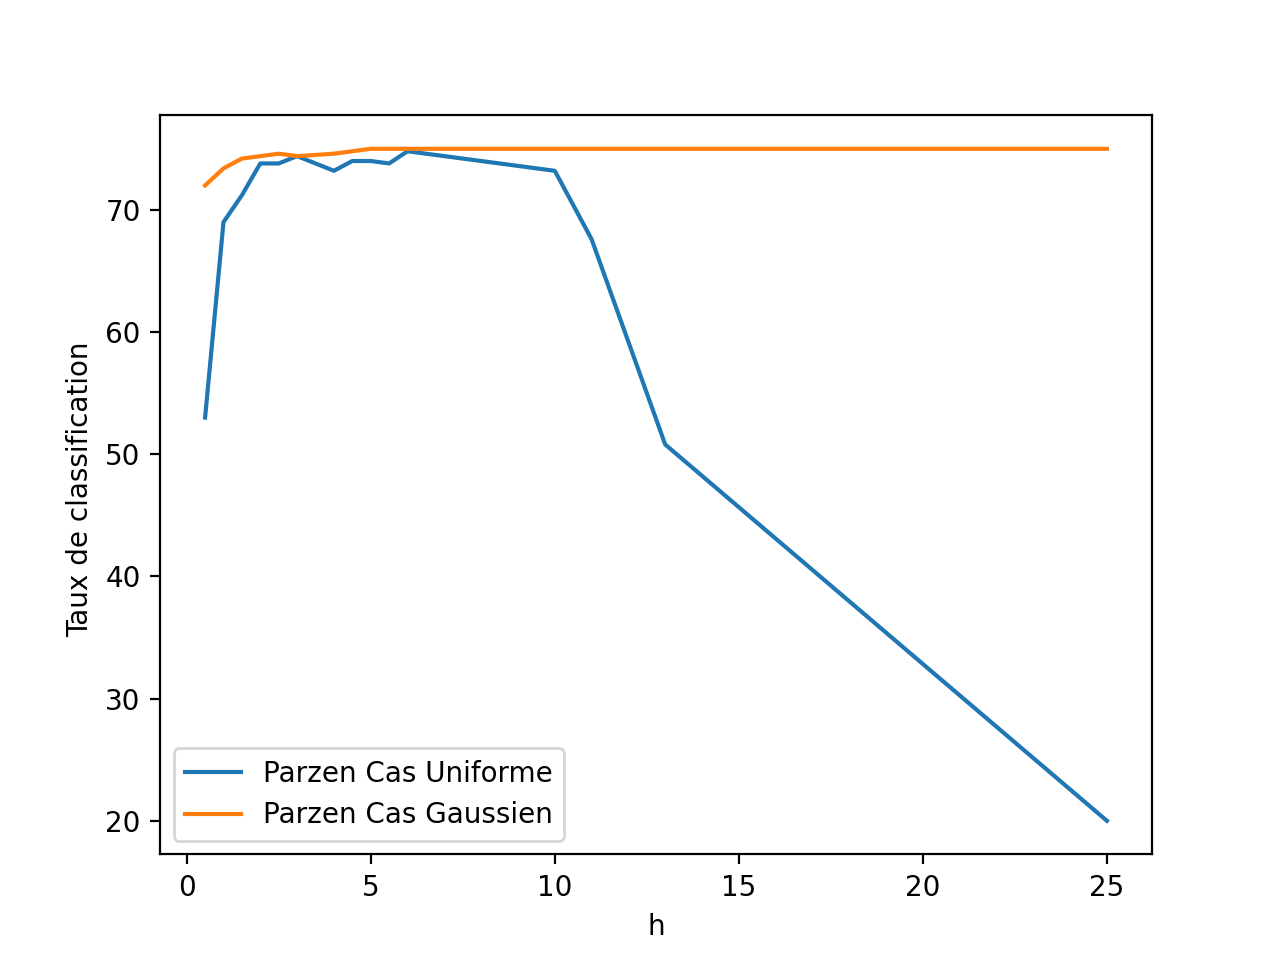

In [432]:
# Jeu 3:5CV Parzen
h=[0.5,1,1.5,2,2.5,3,4,4.5,5,5.5,6,10,11,13,25]
C=cinqCV_Parzen(df3,h)
print(C[0])
print(C[1])
plt.figure(6)
plt.plot(h,C[0],label="Parzen Cas Uniforme")
plt.plot(h,C[1],label="Parzen Cas Gaussien")
plt.xlabel("h")
plt.ylabel("Taux de classification ")
plt.legend()
plt.show()

<font size="5" color="blue" >  <strong>La valeur de h est 6 pour le noyau uniforme et est 5 pour le noyau gaussien, étant donné qu'on obtient la valeur maximale en terme du taux de classification

In [433]:
#Jeu 3:Classification Parzen Cas Uniforme/Gaussien avec l'hyperparamètre h = 6/ h=5
for x in ft3:
    v=x.split(" ")
    pointX=np.zeros((2,1))
    pointX[0,0]=float(v[1])
    pointX[1,0]=float(v[2].split("\n")[0])
    ClassifNG=ClassificationNGaussienne(pointX,df3,5)
    ClassifNU=ClassificationNUniforme(pointX,df3,6)
    
    new_row = {'Classe':int(v[0]), 'x':float(v[1]), 'y':float(v[2].split("\n")[0]),'ClassifTop1FPU':ClassifNU[0],'ClassifTop2FPU':ClassifNU[1],'ClassifTop1FPG':ClassifNG[0],'ClassifTop2FPG':ClassifNG[1]}
    dftm5cvp3 = dftm5cvp3.append(new_row , ignore_index=True)

In [434]:
#Jeu 3:taux de classification TOP1 Parzen Cas Uniforme avec l'hyperparamètre h = 6
TCT1PU5cvp3=(dftm5cvp3.loc[dftm5cvp3.ClassifTop1FPU == dftm5cvp3.Classe]).shape[0]*100/dftm5cvp3.shape[0]
TCT1PU5cvp3

71.8

In [435]:
#Jeu 3:taux d'erreur TOP1 Parzen Cas Uniforme  avec l'hyperparamètre h =6
TET1PU5cvp3=(dftm5cvp3.shape[0]-(dftm5cvp3.loc[dftm5cvp3.ClassifTop1FPU == dftm5cvp3.Classe]).shape[0])*100/dftm5cvp3.shape[0]
TET1PU5cvp3

28.2

In [436]:
#Jeu 3:taux de classification TOP2 Parzen Cas Uniforme  avec l'hyperparamètre h = 6
TCT2PU5cvp3=(dftm5cvp3.loc[(dftm5cvp3.ClassifTop1FPU == dftm5cvp3.Classe) | (dftm5cvp3.ClassifTop2FPU == dftm5cvp3.Classe)]).shape[0]*100/dftm5cvp3.shape[0]
TCT2PU5cvp3

89.0

In [437]:
#Jeu 3:taux d'erreur TOP2 Parzen Cas Uniforme  avec l'hyperparamètre h = 6
TET2PU5cvp3=(dftm5cvp3.shape[0]-(dftm5cvp3.loc[(dftm5cvp3.ClassifTop1FPU == dftm5cvp3.Classe) | (dftm5cvp3.ClassifTop2FPU == dftm5cvp3.Classe)]).shape[0])*100/dftm5cvp3.shape[0]
TET2PU5cvp3

11.0

In [438]:
#Jeu 3:Matrice de confusion du classifieur Parzen Cas Uniforme avec l'hyperparamètre h = 6
MatriceConfusionPNU(dftm5cvp3)

array([[29., 19., 19., 13., 20.],
       [ 7., 81.,  7.,  0.,  5.],
       [12.,  4., 81.,  3.,  0.],
       [10.,  0.,  8., 78.,  4.],
       [ 2.,  8.,  0.,  0., 90.]])

In [439]:
#Jeu 3:taux de classification TOP1 Parzen Cas Gaussien  avec l'hyperparamètre h =5
TCT1PGcvp3=(dftm5cvp3.loc[dftm5cvp3.ClassifTop1FPG == dftm5cvp3.Classe]).shape[0]*100/dftm5cvp3.shape[0]
TCT1PGcvp3

72.8

In [440]:
#Jeu 3:taux d'erreur TOP1 Parzen Cas Gaussien  avec l'hyperparamètre h =5
TET1PGcvp3=(dftm5cvp3.shape[0]-(dftm5cvp3.loc[dftm5cvp3.ClassifTop1FPG == dftm5cvp3.Classe]).shape[0])*100/dftm5cvp3.shape[0]
TET1PGcvp3

27.2

In [441]:
#Jeu 3:taux de classification TOP2 Parzen Cas Gaussien  avec l'hyperparamètre h =5
TCT2PG5cvp3=(dftm5cvp3.loc[(dftm5cvp3.ClassifTop1FPG == dftm5cvp3.Classe) | (dftm5cvp3.ClassifTop2FPG == dftm5cvp3.Classe)]).shape[0]*100/dftm5cvp3.shape[0]
TCT2PG5cvp3

89.0

In [442]:
#Jeu 3:taux d'erreur TOP2 Parzen Cas Gaussien  avec l'hyperparamètre h =5
TET2PG5cvp3=(dftm5cvp3.shape[0]-(dftm5cvp3.loc[(dftm5cvp3.ClassifTop1FPG == dftm5cvp3.Classe) | (dftm5cvp3.ClassifTop2FPG == dftm5cvp3.Classe)]).shape[0])*100/dftm5cvp3.shape[0]
TET2PG5cvp3

11.0

In [443]:
#Jeu 3:Matrice de confusion du classifieur Parzen Cas Gaussien  avec l'hyperparamètre h =5
MatriceConfusionPNG(dftm5cvp3)

array([[31., 19., 19., 14., 17.],
       [ 6., 83.,  6.,  0.,  5.],
       [11.,  4., 82.,  3.,  0.],
       [ 9.,  0., 10., 78.,  3.],
       [ 2.,  8.,  0.,  0., 90.]])

### Pour le classifieur Parzen Pour le cas du noyau uniforme, nous avons obtenu des taux de classification en TOP1 respectif pour le jeu1 , jeu2 et jeu3 comme suit 95,4%, 90,4% et 62,8%

### Pour le classifieur Parzen Pour le cas du noyau uniforme, la cross validation nous a permis de déduire l'hyperparamètre optimal pour les trois jeux qui sont respectivement 2.5 , 4.5 et 6  et qui ont permis d'améliorer les taux de classification TOP1 respectif pour le jeu1 , jeu2 et jeu3 à 99%, 95,2% et 71,8%

### Pour le classifieur Parzen Pour le cas du noyau gaussien, nous avons obtenu des taux de classification TOP1 respectif pour le jeu1 , jeu2 et jeu3 comme suit 99,4%, 95% et 70%

### Pour le classifieur Parzen Pour le cas du noyau gaussien, la cross validation nous a permis de déduire l'hyperparamètre optimal pour les trois jeux qui sont respectivement 1 , 3 et 5  et qui ont permis d'améliorer les taux de classification TOP1  respectif pour le jeu1 , jeu2 et jeu3 à  99,4%, 95% et 72,8%

### Résultat du classifieur  KPPV avec k=1

In [520]:
#Jeu 1:taux de classification TOP1 1PPV
TCT1KPVV=(dftmk.loc[dftmk.ClassifTop1kppv == dftmk.Classe]).shape[0]/dftmk.shape[0]*100
TCT1KPVV

99.4

In [477]:
#Jeu 1:taux d'erreur TOP1 1PPV
TET1PKPVV=(dftmk.shape[0]-(dftmk.loc[dftmk.ClassifTop1kppv == dftmk.Classe]).shape[0])/dftmk.shape[0]
TET1PKPVV

0.006

In [478]:
#Jeu 1:taux de classification TOP2 1PPV
TCT2KPVV=(dftmk.loc[(dftmk.ClassifTop1kppv == dftmk.Classe) | (dftmk.ClassifTop2kppv == dftmk.Classe)]).shape[0]/dftmk.shape[0]
TCT2KPVV

0.994

In [479]:
#Jeu 1:taux d'erreur TOP2 1PPV
TET2KPVV=(dftmk.shape[0]-(dftmk.loc[(dftmk.ClassifTop1kppv == dftmk.Classe) | (dftmk.ClassifTop2kppv == dftmk.Classe)]).shape[0])/dftmk.shape[0]
TET2KPVV

0.006

In [480]:

MatriceConfusionKppv(dftmk)

array([[ 98.,   0.,   0.,   0.,   2.],
       [  0., 100.,   0.,   0.,   0.],
       [  0.,   0., 100.,   0.,   0.],
       [  0.,   0.,   0., 100.,   0.],
       [  0.,   0.,   0.,   1.,  99.]])

In [446]:
#Jeu 1: 5CV KPPV
k=[1,3,5,7]
C=cinqCV_Kppv(df,k)
print(C)
plt.figure(7)
plt.plot(k,C,label="Kppv Top1")
plt.xlabel("k")
plt.ylabel("Taux de classification ")
plt.legend()
plt.show()

[99.6, 99.8, 100.0, 99.8]


<IPython.core.display.Javascript object>


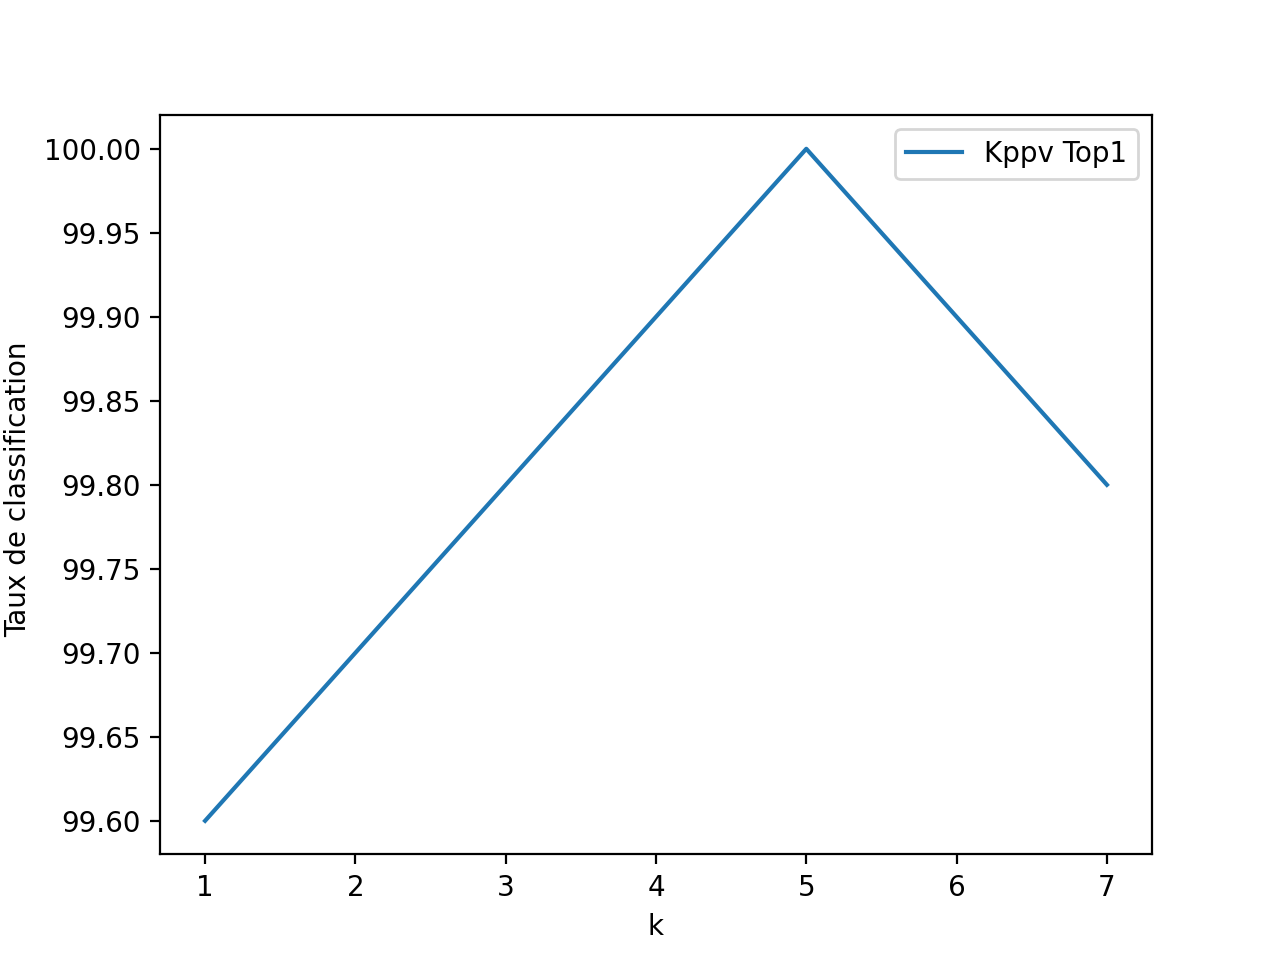

In [450]:
plt.figure(8)
plt.plot(k,C,label="Kppv Top1")
plt.xlabel("k")
plt.ylabel("Taux de classification ")
plt.legend()
plt.show()

 <font size="5" color="blue" >  <strong>La valeur de k est 5 , étant donné qu'on obtient la valeur maximale en terme du taux de classification

In [485]:
#Classification du jeu de test selon Kppv k=5
for x in ft:
    v=x.split(" ")
    pointX=np.zeros((2,1))
    pointX[0,0]=float(v[1])
    pointX[1,0]=float(v[2].split("\n")[0])
    Classif=Classification_kppv(pointX,df,5)
    new_row = {'Classe':int(v[0]), 'x':float(v[1]), 'y':float(v[2].split("\n")[0]),'ClassifTop1kppv':Classif[0],'ClassifTop2kppv':Classif[1]}
    dftmk5 = dftmk5.append(new_row , ignore_index=True)

In [486]:
print(dftmk5)

     Classe         x         y  ClassifTop1kppv  ClassifTop2kppv
0       1.0 -4.840798  5.117552              1.0              1.0
1       1.0 -2.458894  5.701029              1.0              1.0
2       1.0 -5.195775  6.207984              1.0              1.0
3       1.0 -6.059512  4.324269              1.0              1.0
4       1.0 -5.864124  8.061702              1.0              1.0
..      ...       ...       ...              ...              ...
495     5.0 -0.532394 -0.478236              5.0              1.0
496     5.0 -0.596780 -1.310213              5.0              1.0
497     5.0  0.645414  0.058871              5.0              1.0
498     5.0  0.679295 -1.391780              5.0              1.0
499     5.0  0.998671  1.712854              5.0              1.0

[500 rows x 5 columns]


### KPPV avec k=5

In [487]:
#Jeu 1:taux de classification TOP1 5PPV
TCT1KPVV5=(dftmk5.loc[dftmk5.ClassifTop1kppv == dftmk5.Classe]).shape[0]/dftmk5.shape[0]
TCT1KPVV5

0.996

In [488]:
#Jeu 1:taux d'erreur TOP1 5PPV
TET1PKPVV5=(dftmk5.shape[0]-(dftmk5.loc[dftmk5.ClassifTop1kppv == dftmk5.Classe]).shape[0])/dftmk5.shape[0]
TET1PKPVV5

0.004

In [489]:
#Jeu 1:taux de classification TOP2 5PPV
TCT2KPVV5=(dftmk5.loc[(dftmk5.ClassifTop1kppv == dftmk5.Classe) | (dftmk5.ClassifTop2kppv == dftmk5.Classe)]).shape[0]/dftmk5.shape[0]
TCT2KPVV5

0.998

In [490]:
#Jeu 1: taux d'erreur TOP2 5PPV
TET2KPVV5=(dftmk5.shape[0]-(dftmk5.loc[(dftmk5.ClassifTop1kppv == dftmk5.Classe) | (dftmk5.ClassifTop2kppv == dftmk5.Classe)]).shape[0])/dftmk5.shape[0]
TET2KPVV5

0.002

In [491]:
#Jeu 1: Matrice de confusion 5PPV
MatriceConfusionKppv(dftmk5)

array([[ 99.,   0.,   0.,   0.,   1.],
       [  0., 100.,   0.,   0.,   0.],
       [  0.,   0., 100.,   0.,   0.],
       [  0.,   0.,   0., 100.,   0.],
       [  1.,   0.,   0.,   0.,  99.]])

In [492]:
#Jeu 2:taux de classification TOP1 1PPV
TCT1KPVV2=(dftmk2.loc[dftmk2.ClassifTop1kppv == dftmk2.Classe]).shape[0]/dftmk2.shape[0]
TCT1KPVV2

0.928

In [493]:
#Jeu 2:taux d'erreur TOP1 1PPV
TET1PKPVV2=(dftmk2.shape[0]-(dftmk2.loc[dftmk2.ClassifTop1kppv == dftmk2.Classe]).shape[0])/dftmk2.shape[0]
TET1PKPVV2

0.072

In [494]:
#Jeu 2:taux de classification TOP2 1PPV
TCT2KPVV2=(dftmk2.loc[(dftmk2.ClassifTop1kppv == dftmk2.Classe) | (dftmk2.ClassifTop2kppv == dftmk2.Classe)]).shape[0]/dftmk2.shape[0]
TCT2KPVV2

0.928

In [495]:
#Jeu 2:taux d'erreur TOP2 1PPV
TET2KPVV2=(dftmk2.shape[0]-(dftmk2.loc[(dftmk2.ClassifTop1kppv == dftmk2.Classe) | (dftmk2.ClassifTop2kppv == dftmk2.Classe)]).shape[0])/dftmk2.shape[0]
TET2KPVV2

0.072

In [496]:
#Jeu 2:Matrice de confusion 1PPV
MatriceConfusionKppv(dftmk2)

array([[100.,   0.,   0.,   0.,   0.],
       [  0.,  91.,   9.,   0.,   0.],
       [  2.,   4.,  84.,   2.,   8.],
       [  0.,   0.,   3.,  96.,   1.],
       [  0.,   0.,   6.,   1.,  93.]])

[91.0, 92.6, 93.0, 94.0, 93.8, 94.2, 94.4, 94.6, 94.8, 94.8, 94.6]


<IPython.core.display.Javascript object>


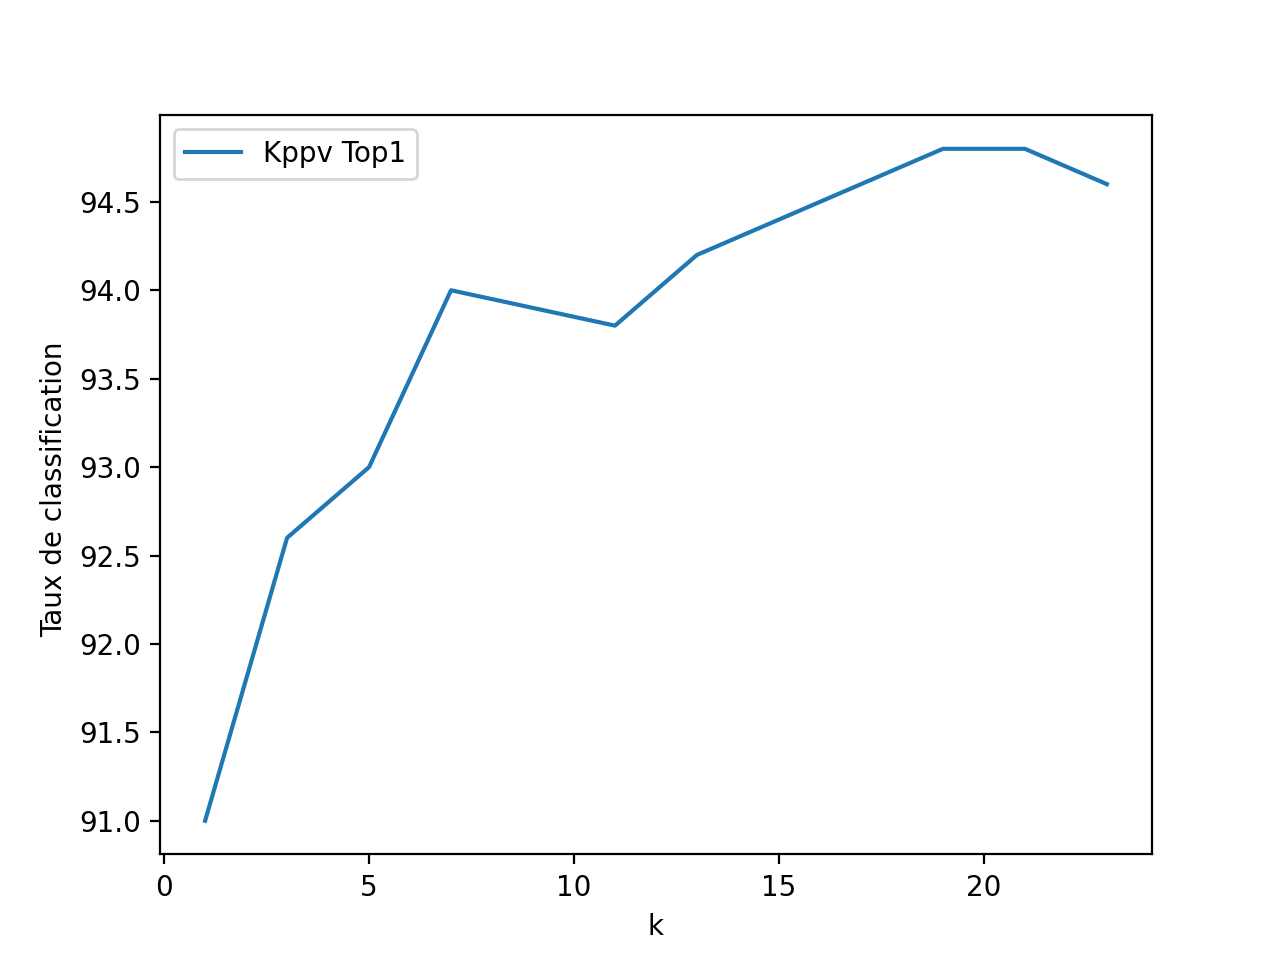

In [534]:
#Jeu 2: 5CV KPPV
k=[1,3,5,7,11,13,15,17,19,21,23]
C=cinqCV_Kppv(df2,k)
print(C)
plt.figure(11)
plt.plot(k,C,label="Kppv Top1")
plt.xlabel("k")
plt.ylabel("Taux de classification ")
plt.legend()
plt.show()

 <font size="5" color="blue" >  <strong>"La valeur de k est 7 , étant donné qu'on obtient la valeur maximale en terme du taux de classification"

In [ ]:
#Classification du jeu de test selon Kppv k=7
for x in ft:
    v=x.split(" ")
    pointX=np.zeros((2,1))
    pointX[0,0]=float(v[1])
    pointX[1,0]=float(v[2].split("\n")[0])
    Classif=Classification_kppv(pointX,df2,7)
    new_row = {'Classe':int(v[0]), 'x':float(v[1]), 'y':float(v[2].split("\n")[0]),'ClassifTop1kppv':Classif[0],'ClassifTop2kppv':Classif[1]}
    dftmk5 = dftmk5.append(new_row , ignore_index=True)

### KPPV avec k=7

In [ ]:
#Jeu 2:taux de classification TOP1 7PPV
TCT1KPVV5=(dftmk5.loc[dftmk5.ClassifTop1Kppv == dftmk5.Classe]).shape[0]/dftmk5.shape[0]
TCT1KPVV5

In [ ]:
#Jeu 2:taux d'erreur TOP1 7PPV
TET1PKPVV5=(dftmk5.shape[0]-(dftmk5.loc[dftmk5.ClassifTop1Kppv == dftmk5.Classe]).shape[0])/dftmk5.shape[0]
TET1PKPVV5

In [ ]:
#Jeu 2:taux de classification TOP2 7PPV
TCT2KPVV5=(dftmk5.loc[(dftmk5.ClassifTop1Kppv == dftmk5.Classe) | (dftmk5.ClassifTop2Kppv == dftmk5.Classe)]).shape[0]/dftmk5.shape[0]
TCT2KPVV5

In [ ]:
#Jeu 2: taux d'erreur TOP2 7PPV
TET2KPVV5=(dftmk5.shape[0]-(dftmk5.loc[(dftmk5.ClassifTop1Kppv == dftmk5.Classe) | (dftmk5.ClassifTop2Kppv == dftmk5.Classe)]).shape[0])/dftmk5.shape[0]
TET2KPVV5

In [ ]:
#Jeu 2: matrice de confusion 7PPV
MatriceConfusionKppv(dftmk5)

 <font size="5" color="blue" >  <strong> Les taux de classification TOP1 et Top2 pour les 3 méthodes estimation gaussienne (Distance euclidienne, Malhanobis) et Parzen Noyau Gaussien environnent 99% et Parzen Noyau vient ensuite avec un taux de 95%.


In [498]:
#Jeu 3:taux de classification TOP1 1PPV
TCT1KPVV3=(dftmk3.loc[dftmk3.ClassifTop1kppv == dftmk3.Classe]).shape[0]/dftmk3.shape[0]
TCT1KPVV3

0.628

In [499]:
#Jeu 3:taux d'erreur TOP1 1PPV
TET1PKPVV3=(dftmk3.shape[0]-(dftmk3.loc[dftmk3.ClassifTop1kppv == dftmk3.Classe]).shape[0])/dftmk3.shape[0]
TET1PKPVV3

0.372

In [500]:
#Jeu 3:taux de classification TOP2 1PPV
TCT2KPVV3=(dftmk3.loc[(dftmk3.ClassifTop1kppv == dftmk3.Classe) | (dftmk3.ClassifTop2kppv == dftmk3.Classe)]).shape[0]/dftmk3.shape[0]
TCT2KPVV3

0.628

In [501]:
#Jeu 3:taux d'erreur TOP2 1PPV
TET2KPVV3=(dftmk3.shape[0]-(dftmk3.loc[(dftmk3.ClassifTop1kppv == dftmk3.Classe) | (dftmk3.ClassifTop2kppv == dftmk3.Classe)]).shape[0])/dftmk3.shape[0]
TET2KPVV3

0.372

In [502]:
#Jeu 3:Matrice de confusion 1PPV
MatriceConfusionKppv(dftmk3)

array([[29., 22., 19., 15., 15.],
       [14., 72.,  6.,  1.,  7.],
       [22.,  5., 72.,  1.,  0.],
       [20.,  2., 11., 63.,  4.],
       [14.,  7.,  1.,  0., 78.]])

[67.0, 70.4, 74.6, 73.4]


<IPython.core.display.Javascript object>


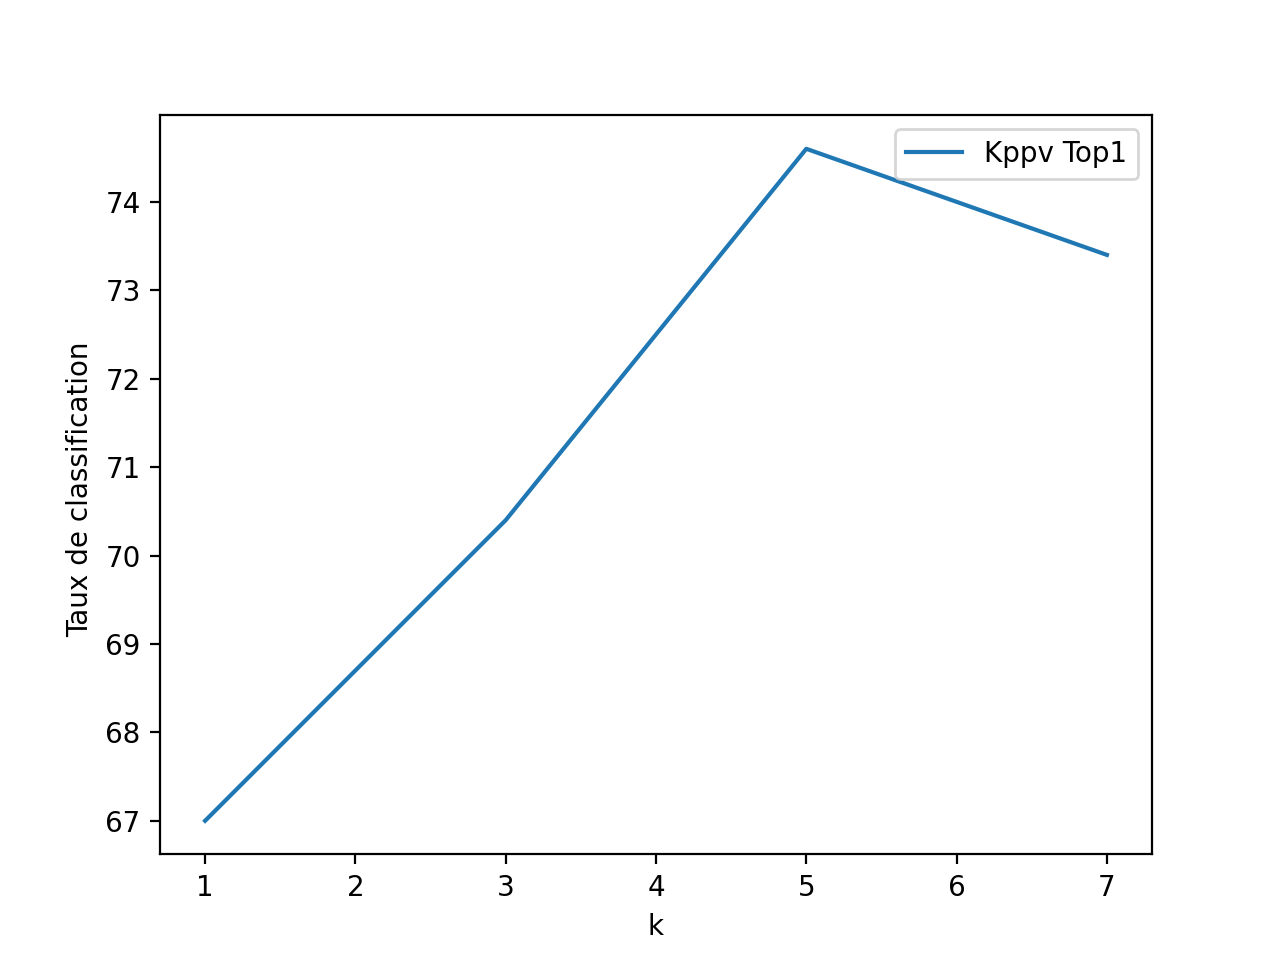

In [533]:
#Jeu 3: 5CV KPPV
k=[1,3,5,7]
C=cinqCV_Kppv(df3,k)
print(C)
plt.figure(12)
plt.plot(k,C,label="Kppv Top1")
plt.xlabel("k")
plt.ylabel("Taux de classification ")
plt.legend()
plt.show()

In [ ]:
<font size="5" color="blue" >  <strong>"La valeur de k est 5 , étant donné qu'on obtient la valeur maximale en terme du taux de classification"

In [ ]:
#Classification du jeu de test selon Kppv k=5
for x in ft:
    v=x.split(" ")
    pointX=np.zeros((2,1))
    pointX[0,0]=float(v[1])
    pointX[1,0]=float(v[2].split("\n")[0])
    Classif=Classification_kppv(pointX,df3,5)
    new_row = {'Classe':int(v[0]), 'x':float(v[1]), 'y':float(v[2].split("\n")[0]),'ClassifTop1kppv':Classif[0],'ClassifTop2kppv':Classif[1]}
    dftmk5 = dftmk5.append(new_row , ignore_index=True)

### KPPV avec k=5

In [ ]:
#Jeu 2:taux de classification TOP1 5PPV
TCT1KPVV5=(dftmk5.loc[dftmk5.ClassifTop1Kppv == dftmk5.Classe]).shape[0]/dftmk5.shape[0]
TCT1KPVV5

In [ ]:
#Jeu 2:taux d'erreur TOP1 5PPV
TET1PKPVV5=(dftmk5.shape[0]-(dftmk5.loc[dftmk5.ClassifTop1Kppv == dftmk5.Classe]).shape[0])/dftmk5.shape[0]
TET1PKPVV5

In [ ]:
#Jeu 2:taux de classification TOP2 5PPV
TCT2KPVV5=(dftmk5.loc[(dftmk5.ClassifTop1Kppv == dftmk5.Classe) | (dftmk5.ClassifTop2Kppv == dftmk5.Classe)]).shape[0]/dftmk5.shape[0]
TCT2KPVV5

In [ ]:
#Jeu 2: taux d'erreur TOP2 5PPV
TET2KPVV5=(dftmk5.shape[0]-(dftmk5.loc[(dftmk5.ClassifTop1Kppv == dftmk5.Classe) | (dftmk5.ClassifTop2Kppv == dftmk5.Classe)]).shape[0])/dftmk5.shape[0]
TET2KPVV5

In [ ]:
#Jeu 2: matrice de confusion 5PPV
MatriceConfusionKppv(dftmk5)

<font size="5" color="blue" >  <strong> Les taux de classification TOP1 pour kppv pour k=1 est de 99,4% pour le jeu1 ,92,8% pour le jeu 2 et 62,8% pour le jeu 3 .

### Application de scikit-learn

In [503]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(df.loc[:,['x', 'y']] , df['Classe'])
neigh.predict([[-4.840798,-5.117552]])
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(df.loc[:,['x', 'y']] , df2['Classe'])
neigh.predict([[-4.840798,-5.117552]])
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(df.loc[:,['x', 'y']] , df3['Classe'])
neigh.predict([[-4.840798,-5.117552]])

array([4.])

In [504]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(df.loc[:,['x', 'y']] , df['Classe'])
taux=knn.score(dftm.loc[:,['x', 'y']] , dftm['Classe'])*100
error = 100 - taux
print('Taux de classification jeu 1: %f' % taux)       
print('Erreur jeu 1: %f' % error)
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(df2.loc[:,['x', 'y']] , df2['Classe'])
taux=knn.score(dftm2.loc[:,['x', 'y']] , dftm2['Classe'])*100
error = 100 - taux
print('Taux de classification jeu 2: %f' % taux)       
print('Erreur jeu 2: %f' % error)
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(df3.loc[:,['x', 'y']] , df3['Classe'])
taux=knn.score(dftm3.loc[:,['x', 'y']] , dftm3['Classe'])*100
error = 100 - taux
print('Taux de classification jeu 3: %f' % taux)       
print('Erreur jeu 3: %f' % error)

Taux de classification jeu 1: 99.600000
Erreur jeu 1: 0.400000
Taux de classification jeu 2: 95.200000
Erreur jeu 2: 4.800000
Taux de classification jeu 3: 68.600000
Erreur jeu 3: 31.400000


In [506]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(df.loc[:,['x', 'y']],  df['Classe'])

#Predict the response for test dataset
y_pred = gnb.predict(dftm.loc[:,['x', 'y']])
y_test= dftm['Classe']

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy Naive Bayes jeu 1:",metrics.accuracy_score(y_test, y_pred)*100)

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(df2.loc[:,['x', 'y']],  df2['Classe'])

#Predict the response for test dataset
y_pred = gnb.predict(dftm2.loc[:,['x', 'y']])
y_test= dftm2['Classe']

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy Naive Bayes jeu 2:",metrics.accuracy_score(y_test, y_pred)*100)

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(df3.loc[:,['x', 'y']],  df3['Classe'])

#Predict the response for test dataset
y_pred = gnb.predict(dftm3.loc[:,['x', 'y']])
y_test= dftm3['Classe']

from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy Naive Bayes jeu 3:",metrics.accuracy_score(y_test, y_pred)*100)


Accuracy Naive Bayes jeu 1: 99.6
Accuracy Naive Bayes jeu 2: 95.39999999999999
Accuracy Naive Bayes jeu 3: 70.0


# Les résultats qu'on a obtenu est trés environnantes aux résultats de scikitlearn.

In [518]:
from sklearn.neighbors import KernelDensity
bandwidths = [0.01, 0.05, 0.1, 0.5, 1, 4]
scoresg= []
scoresn= []
for b in bandwidths:
    kde_model_g = KernelDensity(kernel='gaussian', bandwidth=b)
    kde_model_n = KernelDensity(kernel='tophat', bandwidth=b)
    kde_model_g.fit(df.loc[:,['x', 'y','Classe']])
    kde_model_n.fit(df.loc[:,['x', 'y','Classe']])
    
    scoreg = kde_model_g.score_samples(dftm.loc[:,['x', 'y','Classe']])
    scoren = kde_model_n.score_samples(dftm.loc[:,['x', 'y','Classe']])
    scoresg.append(scoreg)
    scoresn.append(scoren)
plt.figure(5)
plt.plot(h,scoresg)
plt.plot(h,scoresn)
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (15,) and (6, 500)

In [513]:
print(df)
print(dftm)

     Classe         x         y
0       1.0 -6.315382  6.344938
1       1.0 -4.943573  7.821684
2       1.0 -8.920876  2.705258
3       1.0 -5.661533  7.425065
4       1.0 -5.918269  5.697313
..      ...       ...       ...
495     5.0 -1.446325 -0.422072
496     5.0  0.261599  0.479059
497     5.0 -2.243814 -0.673345
498     5.0 -0.489892  0.282347
499     5.0  0.310185  0.024044

[500 rows x 3 columns]
     Classe         x         y  ClassifTop1M  ClassifTop2M  ClassifTop1FPU  \
0       1.0 -4.840798  5.117552           1.0           4.0             1.0   
1       1.0 -2.458894  5.701029           1.0           5.0             1.0   
2       1.0 -5.195775  6.207984           1.0           4.0             1.0   
3       1.0 -6.059512  4.324269           1.0           4.0             1.0   
4       1.0 -5.864124  8.061702           1.0           4.0             1.0   
..      ...       ...       ...           ...           ...             ...   
495     5.0 -0.532394 -0.478236        

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

cv=KFold(5,random_state=0)
cross_val_score(knn,X,y,cv=cv)

# Evaluation des classifieurs 

## Représentation Graphique des résultats des différentes classifications

[0.8, 0.6, 4.6, 0.6]
[0.0, 0.2, 4.3999999999999995, 0.2]
[99.2, 99.4, 95.39999999999999, 99.4]
[100.0, 99.8, 95.6, 99.8]


<IPython.core.display.Javascript object>


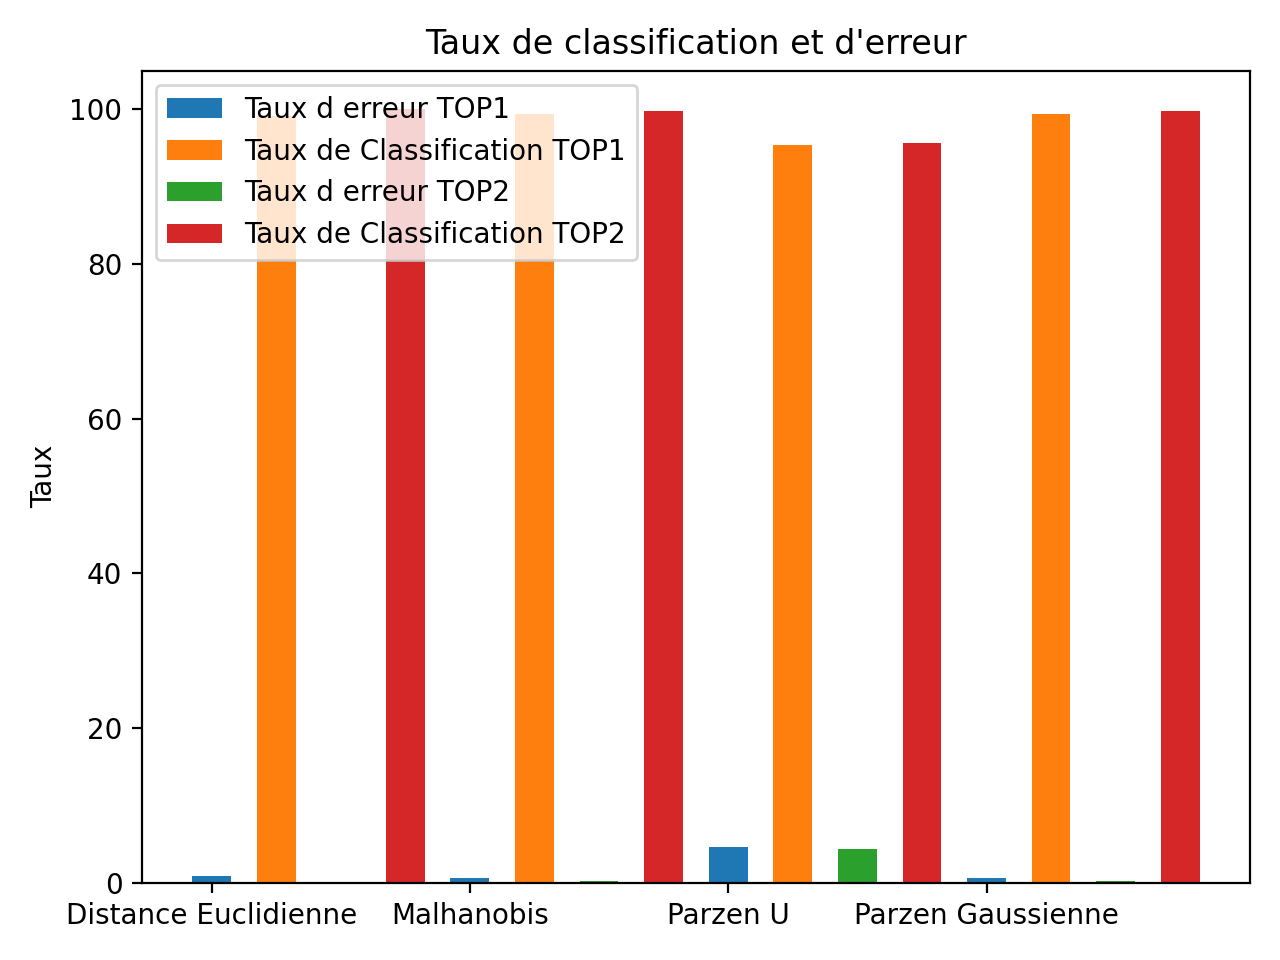

In [66]:
#Représentation Graphique des résultats des différentes classifications
labels = ['Distance Euclidienne', 'Malhanobis', 'Parzen U', 'Parzen Gaussienne','1ppv','5ppv']
Err_Top1val = [TET1DE, TET1M, TET1PU, TET1PG, TET1KPVV, TET1KPVV5]
#Err_Top1val = [int('{:01.1f}'.format(i*100)) for i in Err_Top1val]
Err_Top1val = [i*100 for i in Err_Top1val]
print(Err_Top1val)
Err_Top2val = [TET2DE, TET2M, TET2PU, TET2PG, TET2KPVV, TET2KPVV5]
#Err_Top2val = ['{:01.1f}'.format(i*100) for i in Err_Top2val]
Err_Top2val = [i*100 for i in Err_Top2val]
print(Err_Top2val)
ClassifTop1_val= [TCT1DE, TCT1M, TCT1PU, TCT1PG, TCT1KPVV, TCT1KPVV5]
#ClassifTop1_val = ['{:01.1f}'.format(i*100) for i in ClassifTop1_val]
ClassifTop1_val = [i*100 for i in ClassifTop1_val]
print(ClassifTop1_val)
ClassifTop2_val= [TCT2DE, TCT2M, TCT2PU, TCT2PG, TCT2KPVV, TCT2KPVV5]
#ClassifTop2_val = ['{:01.1f}'.format(i*100) for i in ClassifTop2_val]
ClassifTop2_val = [i*100 for i in ClassifTop2_val]
print(ClassifTop2_val)

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x+ 0.00,Err_Top1val, width, label='Taux d erreur TOP1')
rects2 = ax.bar(x + 0.25, ClassifTop1_val, width, label='Taux de Classification TOP1')
rects3 = ax.bar(x +0.5, Err_Top2val, width, label='Taux d erreur TOP2')
rects4 = ax.bar(x + 0.75, ClassifTop2_val, width, label='Taux de Classification TOP2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Taux')
ax.set_title("Taux de classification et d'erreur")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)
#autolabel(rects4)

fig.tight_layout()
#fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
#yticks = mtick.FormatStrFormatter(fmt)
#ax.yaxis.set_major_formatter(yticks)

plt.show()

 <font size="5" color="blue" >  <strong> Les taux de classification TOP1 et Top2 pour les 3 méthodes estimation gaussienne (Distance euclidienne, Malhanobis) et Parzen Noyau Gaussien environnent 99% et Parzen Noyau vient ensuite avec un taux de 95%.
